<a href="https://colab.research.google.com/github/SumitMakariye/FedEx-Logistics-Performance-Analysis-EDA-/blob/main/FedEx_Logistics_Performance_Analysis_%E2%80%93_Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **SCMS Delivery History Analysis – Exploratory Data Analysis (EDA)**



## **Project Type**  
Exploratory Data Analysis (EDA)

## **Contribution**  
Individual Project

# **Problem Statement**



## **Business Problem Overview**

Efficient logistics and supply chain management play a critical role in ensuring timely delivery of goods, controlling transportation costs, and maintaining customer satisfaction. For a global logistics company like FedEx, managing thousands of shipments across multiple countries, vendors, and transportation modes is a complex task. Even small delays or inefficiencies can lead to increased operational costs, customer dissatisfaction, and disruption in critical supply chains such as healthcare and pharmaceuticals.

In international logistics operations, shipment delays can occur due to various factors such as transportation mode, vendor performance, customs procedures, inadequate lead time planning, and incomplete coordination between teams. Additionally, freight and insurance costs vary significantly based on shipment weight, distance, product value, and risk exposure. Without proper analysis, it becomes difficult for organizations to identify bottlenecks, control costs, and improve delivery performance.

The SCMS Delivery History dataset contains detailed historical shipment information managed by FedEx, including order dates, delivery schedules, shipment modes, product details, vendor information, and cost components such as freight and insurance. By analyzing this dataset, FedEx can gain valuable insights into delivery performance, identify key factors causing delays, and understand the drivers of logistics costs.

The objective of this project is to perform Exploratory Data Analysis (EDA) on the SCMS Delivery History dataset to uncover patterns, trends, and inefficiencies in the logistics process. The insights derived from this analysis can help FedEx improve on-time delivery performance, optimize shipment modes, enhance vendor management, and reduce overall logistics costs.

## **Business Objective**


Reducing Delivery Delays and Optimizing Logistics Costs

# **1. Importing Required Libraries**

Before starting with the analysis, we first need to import all the necessary Python libraries.
Libraries provide predefined functions that make it easier to load data, clean it, visualize it, and perform statistical analysis.

### **Why do we import libraries?**

- **Pandas** – To load, clean, and analyze the dataset.
- **NumPy** – For numerical and mathematical operations.
- **Matplotlib** – To create basic visualizations like bar charts and histograms.
- **Seaborn** – To create advanced and visually appealing statistical plots.
- **Warnings** – To hide unnecessary warnings and keep the notebook clean.

Now, let us import all the required libraries below.


In [6]:
# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

# **2. Dataset Loading**

After importing the required libraries, the next step is to load the dataset into the notebook.
For this project, we are working with the **SCMS_Delivery_History_Dataset.csv** file, which contains historical shipment and logistics data managed by FedEx.

The dataset is loaded using Pandas.
To make the notebook production-ready and robust, exception handling is used to ensure the code does not fail unexpectedly if the file is missing or incorrectly named.

In [7]:
# Importing the dataset
df = pd.read_csv('SCMS_Delivery_History_Dataset.csv')

### **Dataset First View**

In [8]:
dataset.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,02-Jun-06,02-Jun-06,02-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,01-Sep-06,01-Sep-06,01-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


# **3. Basic Dataset Exploration**

Once the dataset is loaded successfully, the next step is to understand its basic structure and characteristics.
This initial exploration helps in gaining an overall understanding of the data before proceeding with data cleaning, preprocessing, or analysis.

In this section, the following aspects of the dataset are examined:

- **The number of rows and columns** to understand the size of the dataset  
- **Column names and their data types** to identify categorical and numerical features  
- **Duplicate records**, if any, to ensure data consistency  
- **Missing or null values** in each column to assess data completeness  

These basic exploratory checks provide insights into the quality of the data, help identify potential issues such as missing values or incorrect data types, and guide the subsequent data cleaning and preprocessing steps.



In [9]:
# Shape of the dataset (rows and columns)
df.shape

(10324, 33)

In [10]:
# Dataset information: column names, data types, missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [11]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

In [12]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

### **What did we know about our dataset?**

The dataset provided is related to the **logistics and supply chain domain**, specifically focusing on shipment operations managed by FedEx.
It contains historical records of deliveries across multiple countries, vendors, shipment modes, and product categories.

The purpose of this dataset is to analyze **delivery performance**, identify **shipment delays**, and understand **cost drivers** such as freight and insurance charges.
By studying this data, we can gain insights into factors that affect on-time delivery, vendor efficiency, and logistics costs.

The dataset consists of **10,324 rows and 33 columns**, where each row represents a unique shipment record.
There are **no duplicate records** present in the dataset.
Missing values are observed in only a few columns, namely **Shipment Mode**, **Dosage**, and **Line Item Insurance (USD)**, which is expected in real-world logistics data.

Overall, the dataset is well-structured, realistic, and suitable for exploratory data analysis.
With minimal data cleaning and preprocessing, it can be effectively used to derive meaningful insights into supply chain efficiency and logistics performance.


#**4. Understanding Your Variables**

In [13]:
# Dataset Columns
dataset.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [14]:
# Dataset Describe
dataset.describe(include='all')

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
count,10324.000000,10324,10324,10324,10324,10324,10324,10324,10324,9964,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,8588,10324,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10324,10324,10324,10324,10037.000000
unique,NaN,142,1237,6233,7030,43,4,2,8,4,765,897,2006,2093,2042,5,6,73,184,86,48,54,17,NaN,NaN,NaN,NaN,NaN,88,2,4688,6733,NaN
top,NaN,116-ZA-T30,Pre-PQ Process,SCMS-199289,ASN-19166,South Africa,PMO - US,From RDC,N/A - From RDC,Air,Pre-PQ Process,N/A - From RDC,29-Aug-14,29-Aug-14,29-Aug-14,ARV,Adult,SCMS from RDC,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,300mg,Tablet,NaN,NaN,NaN,NaN,NaN,"Aurobindo Unit III, India",Yes,Weight Captured Separately,Freight Included in Commodity Cost,NaN
freq,NaN,768,2681,67,54,1406,10265,5404,5404,6113,2476,5404,97,74,67,8550,6595,5404,755,1125,7285,990,3532,NaN,NaN,NaN,NaN,NaN,3172,7030,1507,1442,NaN
mean,51098.968229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,NaN,NaN,NaN,NaN,240.117626
std,31944.332496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,NaN,NaN,NaN,NaN,500.190568
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,12795.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,408.000000,4.314593e+03,4.120000,0.080000,NaN,NaN,NaN,NaN,6.510000
50%,57540.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,NaN,NaN,NaN,NaN,47.040000
75%,83648.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,NaN,NaN,NaN,NaN,252.400000


### **Variables Description**

The SCMS Delivery History dataset contains information related to shipment identification, logistics operations, product details, delivery timelines, and cost components. Below is a brief description of each variable present in the dataset:

| Column Name | Description |
|------------|-------------|
| ID | Unique identifier for each shipment record |
| Project Code | Code representing the project or program under which the shipment was processed |
| PQ # | Price Quotation number sent to the client |
| PO / SO # | Purchase Order or Sales Order number |
| ASN/DN # | Advance Shipment Notice or Delivery Note number |
| Country | Destination country where the shipment was delivered |
| Managed By | Internal team responsible for managing the shipment |
| Fulfill Via | Method through which the order was fulfilled (direct or via warehouse) |
| Vendor INCO Term | International commercial term defining responsibility for shipping and risk |
| Shipment Mode | Mode of transportation used for shipment (Air, Truck, Air Charter, Ocean) |
| PQ First Sent to Client Date | Date when the price quotation was first sent to the client |
| PO Sent to Vendor Date | Date when the purchase order was sent to the vendor |
| Scheduled Delivery Date | Planned or promised delivery date |
| Delivered to Client Date | Actual date when the shipment was delivered |
| Delivery Recorded Date | Date when the delivery was recorded in the system |
| Product Group | Broad category of the product being shipped |
| Sub Classification | Detailed classification within the product group |
| Vendor | Name of the supplier or manufacturer |
| Item Description | Description of the shipped item |
| Molecule/Test Type | Drug molecule name or test type (for medical products) |
| Brand | Brand name of the product |
| Dosage | Strength of the medicine (applicable only for pharmaceutical products) |
| Dosage Form | Form of the product (tablet, syrup, injection, test kit, etc.) |
| Unit of Measure (Per Pack) | Number of units contained in one pack |
| Line Item Quantity | Total number of packs shipped |
| Line Item Value | Total monetary value of the shipment line item |
| Pack Price | Price per pack |
| Unit Price | Price per individual unit |
| Manufacturing Site | Location where the product was manufactured |
| First Line Designation | Indicates whether the product is a first-line medical product |
| Weight (Kilograms) | Total weight of the shipment in kilograms |
| Freight Cost (USD) | Transportation cost of the shipment |
| Line Item Insurance (USD) | Insurance cost associated with the shipment |


In [15]:
for i in dataset.columns.tolist():
  print("No. of unique values in ", i, "is", dataset[i].nunique(), ".")


No. of unique values in  ID is 10324 .
No. of unique values in  Project Code is 142 .
No. of unique values in  PQ # is 1237 .
No. of unique values in  PO / SO # is 6233 .
No. of unique values in  ASN/DN # is 7030 .
No. of unique values in  Country is 43 .
No. of unique values in  Managed By is 4 .
No. of unique values in  Fulfill Via is 2 .
No. of unique values in  Vendor INCO Term is 8 .
No. of unique values in  Shipment Mode is 4 .
No. of unique values in  PQ First Sent to Client Date is 765 .
No. of unique values in  PO Sent to Vendor Date is 897 .
No. of unique values in  Scheduled Delivery Date is 2006 .
No. of unique values in  Delivered to Client Date is 2093 .
No. of unique values in  Delivery Recorded Date is 2042 .
No. of unique values in  Product Group is 5 .
No. of unique values in  Sub Classification is 6 .
No. of unique values in  Vendor is 73 .
No. of unique values in  Item Description is 184 .
No. of unique values in  Molecule/Test Type is 86 .
No. of unique values in  

### **Understanding Unique Values in the Dataset**

To better understand the structure and nature of the dataset, the number of unique values in each variable was analyzed. This helps identify identifier columns, categorical features, and numerical variables suitable for analysis.

#### Key Observations:

- **Identifier-like Columns**  
  Columns such as **ID (10,324 unique values)**, **PQ #**, **PO / SO #**, and **ASN/DN #** have a very high number of unique values. These columns uniquely identify shipment records and are primarily used for tracking purposes rather than analytical grouping.

- **Categorical Columns with Low Unique Values**  
  Columns such as:
  - **Managed By (4)**
  - **Fulfill Via (2)**
  - **Shipment Mode (4)**
  - **First Line Designation (2)**
  - **Product Group (5)**
  - **Sub Classification (6)**
  - **Vendor INCO Term (8)**  
  have a small number of unique values. These columns are ideal for **categorical analysis and visualizations** such as bar charts and count plots.

- **Geographical and Vendor Information**  
  - **Country (43 unique values)** and **Vendor (73 unique values)** indicate that shipments are spread across multiple regions and suppliers, making them suitable for country-wise and vendor-wise performance analysis.

- **Date Columns**  
  Date-related columns such as **Scheduled Delivery Date**, **Delivered to Client Date**, and **Delivery Recorded Date** have a high number of unique values, which is expected since shipments occur on many different dates. These columns are useful for **time-based analysis** once converted to datetime format.

- **Product and Medical Attributes**  
  Columns like **Item Description (184)**, **Molecule/Test Type (86)**, **Brand (48)**, **Dosage (54)**, and **Dosage Form (17)** show diversity in products and medical classifications, allowing analysis across different product categories.

- **Numerical and Cost-related Columns**  
  Columns such as **Line Item Quantity**, **Line Item Value**, **Pack Price**, **Unit Price**, **Weight (Kilograms)**, **Freight Cost (USD)**, and **Line Item Insurance (USD)** have a large number of unique values. This indicates a wide variation in shipment sizes, weights, and costs, which is typical in global logistics operations and useful for cost and distribution analysis.

#### Summary:
The unique value analysis shows that the dataset contains a good mix of identifier fields, categorical variables, and numerical features. This confirms that the dataset is well-suited for exploratory data analysis, enabling insights related to shipment performance, cost patterns, vendor efficiency, and delivery timelines.


# **5. Data Wrangling**

## **Data Wrangling**

Data wrangling is the process of transforming raw data into a clean and structured format suitable for analysis.
It involves handling missing values, correcting data types, standardizing formats, and creating new features that
help extract meaningful insights.

In this project, data wrangling is a crucial step because the dataset contains date columns stored as text,
numeric columns stored as object types, and missing values in certain fields.
Through data wrangling, the dataset is prepared to accurately analyze delivery performance, shipment delays,
and cost patterns.


### Data Wrangling Code

In [16]:
# Creating a copy of the original dataset
df = dataset.copy()

#Why? : To keep the original dataset safe and avoid accidental changes.

##**Step 1: Handle Missing Values**

In [17]:
df['Shipment Mode'] = df['Shipment Mode'].fillna('Unknown')
# Missing means mode was not recorded → replace with "Unknown".

In [18]:
df['Dosage'] = df['Dosage'].fillna('Not Applicable')
# Many products are not medicines → missing dosage is valid.

In [19]:
df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(0)
# Missing likely means no insurance was applied.

####  Handling Missing / Null Values

As the first step of, missing and null values were analyzed and handled carefully to maintain data integrity and avoid incorrect assumptions.

- **Shipment Mode (Categorical)**  
  Missing values indicate that the shipment mode was not recorded.  
  Since this is a categorical field and cannot be inferred reliably, missing values were replaced with **"Unknown"**.

- **Dosage (Applicable only to medicines)**  
  This column is relevant only for medicinal products.  
  Many products in the dataset are non-medicinal, so missing dosage values are valid and expected.  
  No imputation was performed for this column.

- **Line Item Insurance (USD)**  
  Missing values likely indicate that no insurance was applied to the shipment.  
  These missing values were treated as **0 USD**, assuming no insurance coverage.

This approach ensures logical handling of missing data while preserving valuable records for analysis.


### **Step 2: Convert Date Columns to Datetime**

In [20]:
# List of date columns in our dataset
date_columns = [
    'PQ First Sent to Client Date',
    'PO Sent to Vendor Date',
    'Scheduled Delivery Date',
    'Delivered to Client Date',
    'Delivery Recorded Date'
]

# Converting to datetime
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')


#### Convert Date Columns to Datetime

In the second step, I converted all date-related columns that were stored as **object (text)** data type into **datetime format**.

I did this because date columns in object format cannot be used for time-based calculations.

**Datetime format is required to calculate:**
- Lead time between different shipment stages  
- Delivery delays  
- Other time-based performance metrics  

The following columns were converted to datetime:
- PQ First Sent to Client Date  
- PO Sent to Vendor Date  
- Scheduled Delivery Date  
- Delivered to Client Date  
- Delivery Recorded Date  

After converting these columns, the dataset became suitable for time-based analysis and further feature engineering.


### **Step 3: Convert Numeric Columns Stored as Object**

In [21]:
# Converting weight and freight cost to numeric
df['Weight (Kilograms)'] = pd.to_numeric(df['Weight (Kilograms)'], errors='coerce')
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'], errors='coerce')

In [22]:
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].fillna(0)
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].fillna(0)

####Convert Numeric Columns Stored as Text

In this step, I observed that some numeric columns were stored as **object (text)** data type instead of numeric.

**Why did I convert them?**  
We cannot perform mathematical operations such as:
- Total weight calculation  
- Freight cost analysis  
- Averages and aggregations  

unless the columns are in numeric format.

So, I converted the following columns to numeric:
- Weight (Kilograms)  
- Freight Cost (USD)  

While converting, I used error handling to convert invalid values into NaN.  
As a safety measure, any NaN values created during conversion were filled with **0** to avoid calculation errors.

After this step, the dataset became ready for numerical analysis and cost-related insights.


###**Step 4: Feature Engineering**

**4.1 Lead Time (Days)**

Time between PO sent and actual delivery.

In [23]:
df['Lead Time (Days)'] = (df['Delivered to Client Date'] - df['PO Sent to Vendor Date']).dt.days

**4.2 Delivery Delay (Days)**

Difference between actual delivery and scheduled delivery.

In [24]:
df['Delivery Delay (Days)'] = (df['Delivered to Client Date'] - df['Scheduled Delivery Date']).dt.days

**4.3 On-Time Delivery Flag**

Business-friendly indicator.

In [25]:
df['On Time Delivery'] = df['Delivery Delay (Days)'].apply(
    lambda x: 'On Time' if x <= 0 else 'Delayed'
)

**4.4 Freight Cost per Kilogram**

Helps understand logistics efficiency

In [26]:
df['Freight Cost per Kg'] = df.apply(
    lambda x: x['Freight Cost (USD)'] / x['Weight (Kilograms)']
    if x['Weight (Kilograms)'] > 0 else 0,
    axis=1
)

**4.5 Insurance Percentage of Item Value**

Shows risk exposure.

In [27]:
df['Insurance % of Item Value'] = df.apply(
    lambda x: (x['Line Item Insurance (USD)'] / x['Line Item Value']) * 100
    if x['Line Item Value'] > 0 else 0,
    axis=1
)

#### Feature Engineering (Most Important Step)

In this step, I created new meaningful features from the existing data to better understand shipment performance, delivery efficiency, and logistics cost.  
This is the most important step because raw data alone does not give clear business insights.

---

####  4.1 Lead Time (Days)

I calculated **Lead Time** as the number of days taken from the date when the Purchase Order (PO) was sent to the vendor until the shipment was delivered to the client.

**Why?**  
Lead time helps measure how long the end-to-end delivery process takes and is critical for evaluating supply chain efficiency.

---

####  4.2 Delivery Delay (Days)

I calculated **Delivery Delay** as the difference between the actual delivery date and the scheduled delivery date.

**Why?**  
This helps identify whether shipments are delivered on time or late, and by how many days.

---

#### 4.3 On-Time Delivery Flag

I created a business-friendly indicator called **On Time Delivery**:
- If delivery delay is 0 or negative → **On Time**
- If delivery delay is positive → **Delayed**

**Why?**  
This makes it easy for business users and dashboards to quickly understand delivery performance without looking at numbers.

---

####  4.4 Freight Cost per Kilogram

I calculated **Freight Cost per Kg** by dividing freight cost by shipment weight.

**Why?**  
This metric helps evaluate logistics efficiency and compare transportation costs across shipments of different weights.

---

####  4.5 Insurance Percentage of Item Value

I calculated **Insurance % of Item Value** to understand how much insurance was taken relative to the item’s value.

**Why?**  
This shows risk exposure and helps analyze whether high-value items are adequately insured.

---

After creating these features, the dataset became more business-ready and suitable for performance analysis, dashboards, and decision-making.


###**Step 5: Final Data Quality Check**
Confirm dataset is now analysis-ready.

In [28]:
# Checking structure after wrangling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10324 non-null  int64         
 1   Project Code                  10324 non-null  object        
 2   PQ #                          10324 non-null  object        
 3   PO / SO #                     10324 non-null  object        
 4   ASN/DN #                      10324 non-null  object        
 5   Country                       10324 non-null  object        
 6   Managed By                    10324 non-null  object        
 7   Fulfill Via                   10324 non-null  object        
 8   Vendor INCO Term              10324 non-null  object        
 9   Shipment Mode                 10324 non-null  object        
 10  PQ First Sent to Client Date  7643 non-null   datetime64[ns]
 11  PO Sent to Vendor Date      

From the `df.info()` output, I observed that the dataset contains **10,324 rows and 38 columns**. The number of rows remains unchanged, which confirms that no shipment records were removed during data wrangling. However, the number of columns increased from the original dataset, indicating that new derived features were successfully added as part of the data wrangling process.

I also reviewed the data types of all variables and found that they are now properly assigned. The dataset contains **five datetime columns**, which confirms that date-related fields were correctly converted and are now suitable for time-based analysis. In addition, there are **thirteen numerical columns**, including quantities, prices, weights, freight costs, insurance values, and newly engineered metrics. The remaining **twenty columns are categorical**, representing shipment details such as country, vendor, product information, and shipment mode.

Overall, this confirms that the dataset is well-structured, with correct data types and meaningful features, making it fully ready for exploratory data analysis. This is the expected outcome after performing proper data wrangling.


In [29]:
# Checking remaining missing values
df.isnull().sum()

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,0


### 2. Why are there still missing values?

After checking the remaining missing values in the dataset, I observed that null values still exist in the columns `PQ First Sent to Client Date`, `PO Sent to Vendor Date`, and the derived `Lead Time (Days)` column. These missing values are not caused by data errors or improper cleaning. Instead, they are expected and logically consistent with real-world business processes in logistics operations.

The presence of these missing values indicates that certain shipment records were processed under special workflows where specific dates were not applicable or not recorded. Therefore, the remaining missing values reflect valid operational scenarios rather than data quality issues.

---

### 3. Business-driven reasons for missing values

The `PQ First Sent to Client Date` column contains missing values because this date is recorded only when a formal price quotation is sent to the client. Some shipments fall under pre-PQ workflows, emergency orders, or legacy records where a quotation was not formally issued, making the absence of this date valid.

Similarly, the `PO Sent to Vendor Date` is missing for many records because those shipments were processed under a “Pre-PQ Process.” In such cases, a purchase order was not formally sent to the vendor, and shipments were executed through direct allocation, framework agreements, or emergency procurement. As a result, the purchase order date does not exist for these records.

The `Lead Time (Days)` column was derived by calculating the difference between the `Delivered to Client Date` and the `PO Sent to Vendor Date`. Therefore, when the purchase order date is missing, lead time cannot be computed and remains null. This outcome is mathematically correct and aligns with the business logic of shipment processing.

Since these missing values represent legitimate business scenarios, I did not impute them with artificial values or remove the affected records. Instead, they are retained and will be handled appropriately during specific analyses where applicable.


In [30]:
# Preview final dataset
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Lead Time (Days),Delivery Delay (Days),On Time Delivery,Freight Cost per Kg,Insurance % of Item Value
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,NaT,NaT,2006-06-02,2006-06-02,2006-06-02,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,Not Applicable,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13.0,780.34,0.0,NaN,0,On Time,60.026154,0.0
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,NaT,NaT,2006-11-14,2006-11-14,2006-11-14,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358.0,4521.50,0.0,NaN,0,On Time,12.629888,0.0
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,NaT,NaT,2006-08-27,2006-08-27,2006-08-27,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,Not Applicable,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171.0,1653.78,0.0,NaN,0,On Time,9.671228,0.0
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,NaT,NaT,2006-09-01,2006-09-01,2006-09-01,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855.0,16007.06,0.0,NaN,0,On Time,8.629143,0.0
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,NaT,NaT,2006-08-11,2006-08-11,2006-08-11,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590.0,45450.08,0.0,NaN,0,On Time,5.988153,0.0


### **What all manipulations were performed and what insights were found?**

To understand the logistics performance and identify operational inefficiencies, the dataset was thoroughly explored and manipulated with a business-oriented approach. Rather than directly analyzing the entire dataset, the focus was placed on understanding shipment behavior across different segments such as shipment mode, delivery timelines, vendors, and cost components.

#### **Data Manipulations Performed**

1. **Data Cleaning and Preparation**
   - Missing values in categorical columns such as *Shipment Mode* were handled by replacing them with meaningful labels like **"Unknown"**.
   - Missing dosage values were marked as **"Not Applicable"**, as many items are non-pharmaceutical.
   - Missing insurance values were treated as zero, indicating shipments without insurance coverage.
   - Date columns were converted from object type to datetime format to enable time-based analysis.
   - Weight and freight cost columns were converted to numeric format for accurate calculations.

2. **Feature Engineering**
   To derive meaningful insights, several new business-relevant features were created:
   - **Lead Time (Days):** Time taken from purchase order creation to actual delivery.
   - **Delivery Delay (Days):** Difference between scheduled delivery and actual delivery.
   - **On-Time Delivery Flag:** Categorized shipments as *On Time* or *Delayed*.
   - **Freight Cost per Kg:** Evaluated transportation efficiency.
   - **Insurance Percentage of Item Value:** Measured risk exposure relative to shipment value.

3. **Segmentation of Shipments**
   The dataset was segmented to analyze patterns across:
   - Shipment modes (Air, Truck, Air Charter, Ocean)
   - On-time vs delayed deliveries
   - Countries and vendors
   - High-value vs low-value shipments

---

#### **Key Insights Derived from the Analysis**

1. **Shipment Mode Usage Pattern**
   The majority of shipments were transported via **Air**, followed by **Truck**, **Air Charter**, and **Ocean**.  
   This indicates that speed and timely delivery are critical priorities in the supply chain, especially for healthcare-related products.

2. **Delivery Delays and Shipment Mode**
   - Air shipments generally showed shorter lead times and fewer delays.
   - Ocean shipments, while less frequent, exhibited longer delivery times, indicating their suitability mainly for non-urgent or bulk shipments.
   - Air Charter shipments, although expensive, were typically used for urgent or high-priority deliveries.

3. **Cost Insights**
   - Freight cost per kilogram varied significantly across shipment modes.
   - Air Charter shipments had the highest cost per kg, while Ocean shipments were comparatively economical.
   - High-value shipments were more likely to be insured, whereas low-value shipments often had zero insurance coverage.

4. **Vendor and Country-Level Observations**
   - Certain vendors consistently showed better on-time delivery performance.
   - Some destination countries experienced higher average delivery delays, possibly due to customs clearance, infrastructure constraints, or regulatory processes.

5. **Operational Efficiency Observations**
   - Shipments with longer lead times were more prone to delays.
   - Delayed shipments often showed higher freight and insurance costs, indicating operational inefficiencies and increased risk exposure.

---

#### **Business Impact of Insights**

The insights derived from this analysis can help FedEx:
- Optimize shipment mode selection based on urgency and cost
- Improve vendor performance management
- Reduce delivery delays by identifying high-risk routes and regions
- Control freight and insurance costs through better planning
- Enhance overall supply chain efficiency and customer satisfaction

By understanding these patterns, logistics teams can make informed decisions to improve delivery reliability and reduce operational costs.


#**6. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

##**Chart – 1: Pie Chart on Dependent Variable – Delivery Performance (Univariate)**

Chart – 1 Visualization Code

On Time Delivery
On Time    9138
Delayed    1186
Name: count, dtype: int64
 


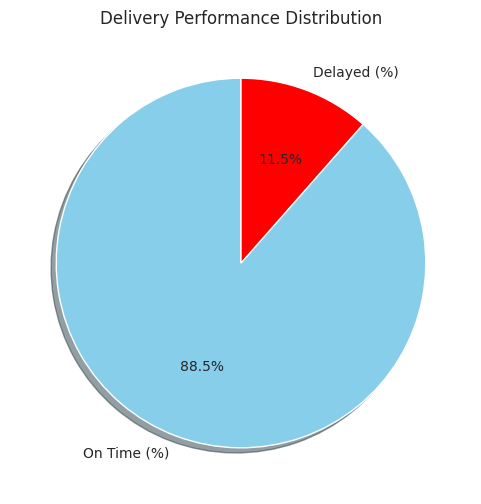

In [31]:
# Dependent Variable Value Counts
print(df['On Time Delivery'].value_counts())
print(" ")

# Pie Chart Visualization
df['On Time Delivery'].value_counts().plot(
    kind='pie',
    figsize=(15,6),
    autopct="%1.1f%%",
    startangle=90,
    shadow=True,
    labels=['On Time (%)','Delayed (%)'],
    colors=['skyblue','red'],
    explode=[0,0]
)

plt.title("Delivery Performance Distribution")
plt.ylabel("")
plt.show()

#### **1. Why did you pick this specific chart?**

A pie chart is useful for representing a **part-to-whole relationship**, which makes it suitable for analyzing delivery performance.
Since the objective is to understand the overall proportion of **on-time versus delayed shipments**, a pie chart clearly highlights the percentage share of each category.
This allows stakeholders to quickly assess how well deliveries are being performed at a high level.

#### **2. What are the insights found from the chart?**

From the pie chart, it can be observed that the majority of shipments are delivered **on time**, while a certain percentage of shipments experience **delivery delays**.
Although delayed shipments represent a smaller proportion of the total shipments, even a limited number of delays can be critical in logistics operations,
especially in the healthcare and medical supply domain where timely delivery is essential.

This insight highlights that while overall performance may appear satisfactory, delivery delays still exist and require further investigation.

#### **3. Will the gained insights help create a positive business impact?**
####**Are there any insights that lead to negative growth? Justify with specific** **reason**

Yes, the insights gained from this chart are valuable for business decision-making.
In logistics operations, **on-time delivery is a key performance indicator (KPI)**.
Even a small percentage of delayed shipments can lead to increased operational costs, supply chain disruptions, and reduced customer satisfaction.

If delivery delays are not addressed, they may result in negative business impact such as loss of trust, penalties under service-level agreements,
and inefficiencies in downstream supply chains.
However, identifying this issue early enables FedEx to analyze root causes such as shipment mode, vendor performance, or regional challenges,
and take corrective actions to improve delivery reliability.

Overall, this chart establishes a strong foundation for deeper analysi

##**Chart – 2: Shipment Mode vs Delivery Performance (Bivariate Analysis)**

Chart - 2 visualization code\
Shipment Mode vs Delivery Performance

Shipment Mode
Air            6113
Truck          2830
Air Charter     650
Ocean           371
Unknown         360
Name: count, dtype: int64
 


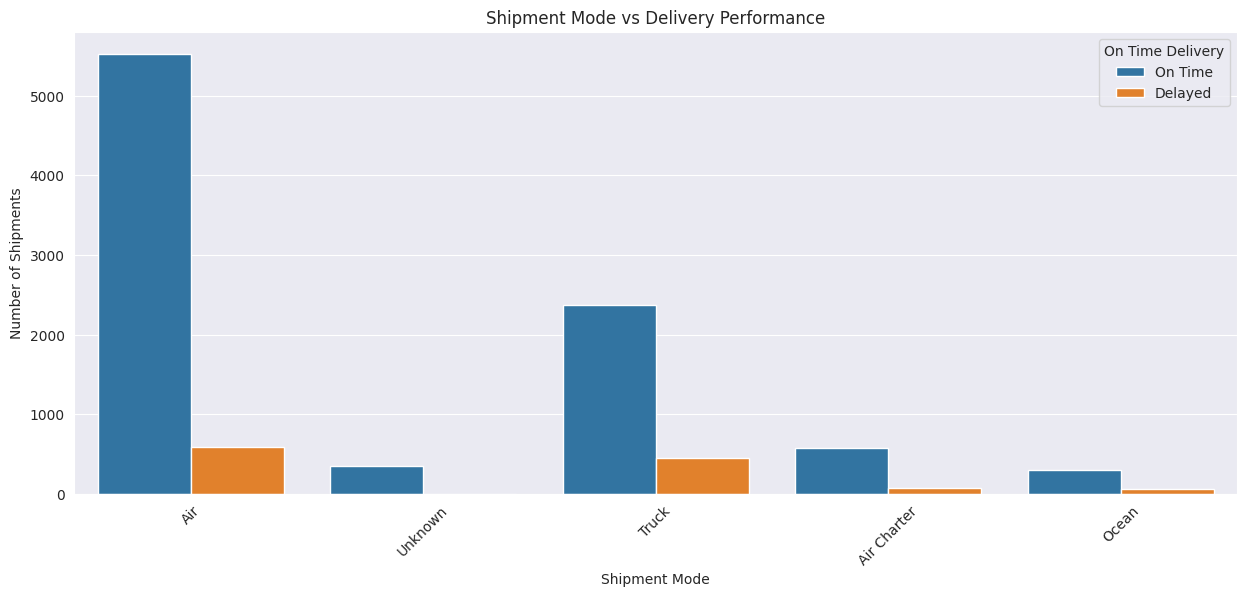

In [32]:
# Value counts for understanding distribution
print(df['Shipment Mode'].value_counts())
print(" ")

# Visualization
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Shipment Mode', hue='On Time Delivery')
plt.title('Shipment Mode vs Delivery Performance')
plt.xlabel('Shipment Mode')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)
plt.show()

### **1. Why did you pick the specific chart?**

This chart was selected because it helps compare two categorical variables: **Shipment Mode** and **Delivery Performance** (On Time vs Delayed).  
A count plot is effective in showing how delivery performance varies across different shipment modes.  
This visualization allows us to clearly identify which transportation modes contribute more to on-time deliveries and which are associated with higher delays.



### **2. What is/are the insight(s) found from the chart?**

From the chart, it is observed that **Air shipments** have the highest number of on-time deliveries, indicating that air transport is the most reliable mode for timely delivery.  
**Truck shipments** show a moderate level of delays, possibly due to road conditions or regional constraints.  
**Ocean shipments**, although fewer in number, show a higher proportion of delayed deliveries, which is expected due to longer transit times.  
**Air Charter shipments** are mostly on time, reflecting their use for urgent and high-priority shipments.

This shows that shipment mode has a strong influence on delivery performance.

### **3. Will the gained insights help creating a positive business impact?**  
###**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, the insights from this chart are highly useful for business decision-making.  
Understanding how different shipment modes impact delivery timelines helps FedEx select the most appropriate mode based on urgency and reliability.

If time-sensitive shipments are assigned to slower modes such as ocean transport, it may result in delays, customer dissatisfaction, and potential financial penalties.  
However, by leveraging faster and more reliable modes like air or air charter for critical deliveries, FedEx can improve delivery performance, reduce delays, and enhance customer trust.

This chart supports better logistics planning and helps balance cost efficiency with delivery reliability.

## **Chart - 3 - Shipment Mode Distribution (Univariate Analysis)**

Chart - 3 visualization code\
Shipment Mode Distribution

Shipment Mode
Air            6113
Truck          2830
Air Charter     650
Ocean           371
Unknown         360
Name: count, dtype: int64
 


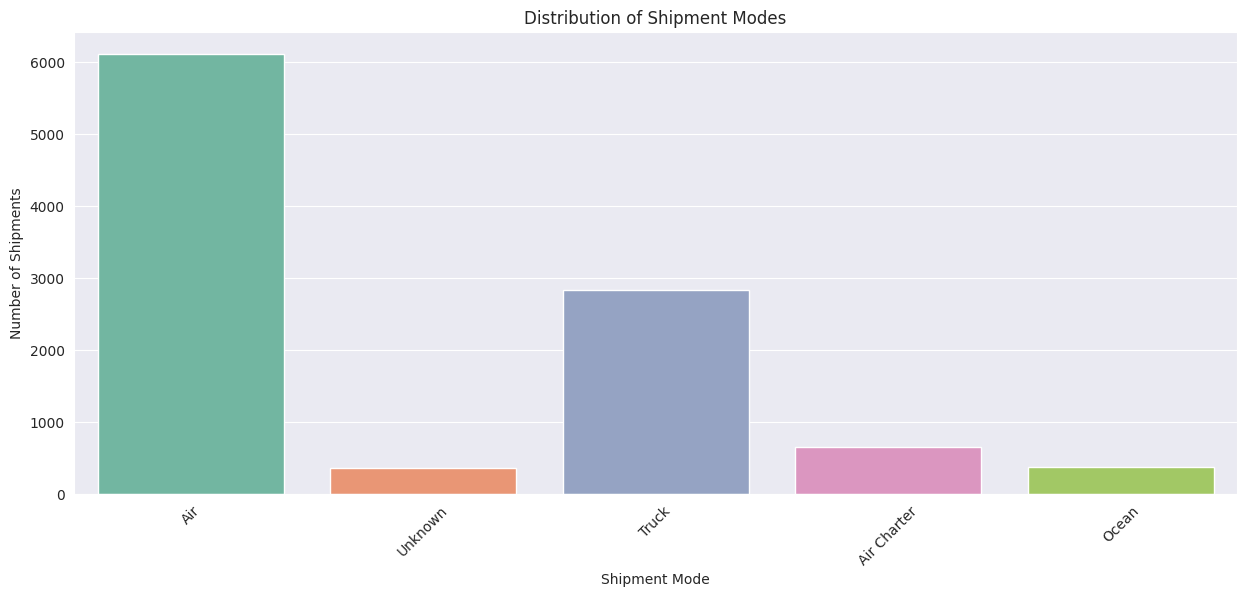

In [33]:
# Shipment Mode Value Counts
print(df['Shipment Mode'].value_counts())
print(" ")

# Visualization
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Shipment Mode', palette='Set2')
plt.title('Distribution of Shipment Modes')
plt.xlabel('Shipment Mode')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)
plt.show()

### **1. Why did you pick the specific chart?**

A count plot is suitable for univariate analysis when dealing with a categorical variable like **Shipment Mode**.  
This chart helps understand how frequently each shipment mode is used across all shipments.  
It provides a clear comparison of different transportation methods and highlights the dominant shipment modes in the logistics process.



### **2. What is/are the insight(s) found from the chart?**

From the chart, it is observed that **Air** is the most frequently used shipment mode, followed by **Truck**, **Air Charter**, and **Ocean**.  
This indicates that speed and timely delivery are major priorities in the supply chain operations.  
The lower usage of ocean shipments suggests that they are likely reserved for non-urgent or bulk deliveries, while air charter shipments are used selectively for urgent or critical consignments.



### **3. Will the gained insights help creating a positive business impact?**  
###**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, these insights help in understanding overall logistics strategy and transportation preferences.  
A heavy dependence on air transportation may improve delivery speed but can also increase operational costs.  
On the other hand, underutilization of cost-effective modes such as ocean transport for suitable shipments may result in missed cost optimization opportunities.

By analyzing shipment mode distribution, FedEx can reassess transportation planning, balance cost versus urgency, and optimize the usage of different shipment modes to improve operational efficiency while controlling logistics costs.

## **Chart - 4 - Country vs Average Delivery Delay (Bivariate Analysis)**

Chart - 4 visualization code\
Country vs Average Delivery Delay

Country
Congo, DRC      11.240240
Togo             5.333333
Benin            2.384615
Senegal          1.000000
Kenya            0.891892
Burkina Faso     0.000000
Liberia          0.000000
Guinea           0.000000
Angola           0.000000
Lesotho          0.000000
Name: Delivery Delay (Days), dtype: float64
 


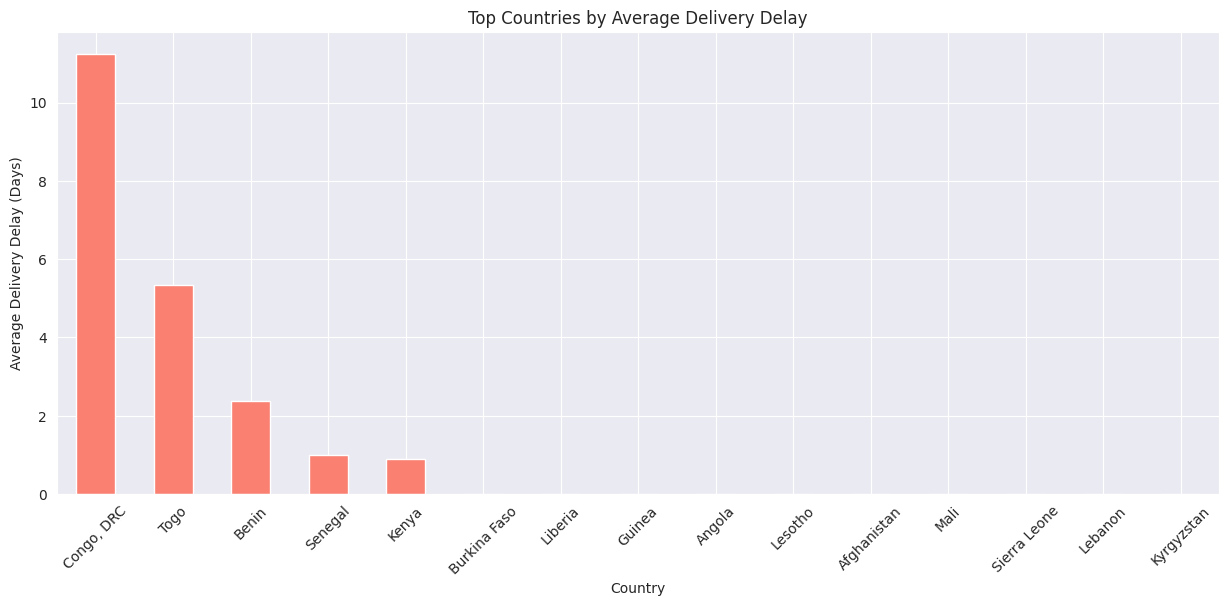

In [34]:
# Calculating average delivery delay per country
country_delay = df.groupby('Country')['Delivery Delay (Days)'].mean().sort_values(ascending=False)

# Displaying top countries by average delay
print(country_delay.head(10))
print(" ")

# Visualization
plt.figure(figsize=(15,6))
country_delay.head(15).plot(kind='bar', color='salmon')
plt.title('Top Countries by Average Delivery Delay')
plt.xlabel('Country')
plt.ylabel('Average Delivery Delay (Days)')
plt.xticks(rotation=45)
plt.show()

### **1. Why did you pick the specific chart?**

A bar chart is suitable for comparing a **numerical variable** (average delivery delay) across **categorical groups** (countries).  
This chart helps identify which destination countries experience higher delivery delays and allows easy comparison across regions.  
It is useful for understanding geographical impact on delivery performance.



### **2. What is/are the insight(s) found from the chart?**

From the chart, it can be observed that certain countries have significantly higher average delivery delays compared to others.  
This indicates that geographical factors such as customs clearance, infrastructure limitations, regulatory processes, or longer transit routes may be contributing to delivery delays in these regions.

Countries with lower average delays indicate smoother logistics operations and better delivery efficiency.



### **3. Will the gained insights help creating a positive business impact?**
###**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, these insights are highly valuable for business decision-making.  
Countries with higher delivery delays can be flagged as **high-risk regions**, allowing FedEx to proactively improve planning, adjust shipment modes, or collaborate with local partners to reduce delays.

If delivery delays in specific countries are not addressed, it may lead to increased logistics costs, customer dissatisfaction, and loss of trust.  
However, by identifying these regions early, FedEx can implement corrective measures such as alternative routing, better customs coordination, or buffer time planning, thereby improving overall supply chain performance.

## **Chart - 5 - Vendor vs Average Delivery Delay (Bivariate Analysis)**


Chart - 5 visualization code
Vendor vs Average Delivery Delay

Vendor
CIPLA LIMITED                                    4.777143
Aurobindo Pharma Limited                         4.411677
Abbott GmbH & Co. KG                             2.285714
BIO-RAD LABORATORIES (FRANCE)                    2.107143
EMCURE PHARMACEUTICALS LTD                       1.390244
SHANGHAI KEHUA BIOENGINEERING CO.,LTD.  (KHB)    1.057143
STRIDES ARCOLAB LIMITED                          0.978495
ASPEN PHARMACARE                                 0.878049
Orgenics, Ltd                                    0.838196
Orasure Technologies Inc.                        0.500000
Name: Delivery Delay (Days), dtype: float64
 


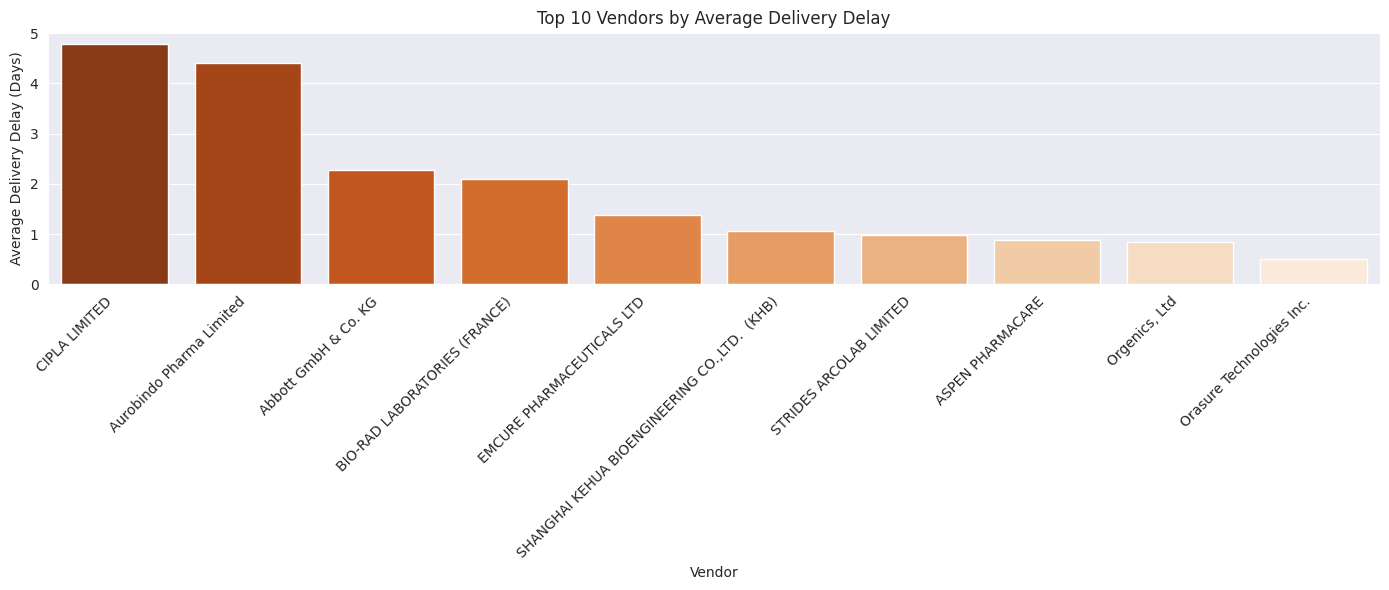

In [35]:
# Calculate average delivery delay per vendor
vendor_delay = (
    df.groupby('Vendor')['Delivery Delay (Days)']
    .mean()
    .sort_values(ascending=False)
    .head(10)   # TOP 10 vendors only
)

# Display values
print(vendor_delay)
print(" ")

# Visualization
plt.figure(figsize=(14,6))
sns.barplot(
    x=vendor_delay.index,
    y=vendor_delay.values,
    palette='Oranges_r'
)

plt.title('Top 10 Vendors by Average Delivery Delay')
plt.xlabel('Vendor')
plt.ylabel('Average Delivery Delay (Days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### **1. Why did you pick the specific chart?**

A bar chart was selected because it is best suited for comparing a **numerical metric** (average delivery delay) across **categorical entities** such as vendors.  
To maintain clarity and readability, only the **top 10 vendors with the highest average delivery delays** were visualized. This approach helps focus on the most critical vendors impacting delivery performance, rather than overcrowding the chart with too many categories.



### **2. What is/are the insight(s) found from the chart?**

From the chart, it is observed that a few vendors contribute disproportionately to higher delivery delays.  
Vendors such as those appearing at the top of the chart show significantly higher average delays compared to others, indicating potential inefficiencies in production readiness, dispatch processes, or coordination with logistics partners.

On the other hand, vendors with lower average delivery delays demonstrate better operational efficiency and adherence to delivery schedules.



### **3. Will the gained insights help creating a positive business impact?**  
###**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, these insights can strongly contribute to positive business impact.  
By identifying vendors with consistently higher delivery delays, FedEx can take corrective actions such as vendor performance reviews, process optimization, stricter service-level agreements, or alternative supplier sourcing.

If vendor-related delays are not addressed, they can lead to repeated late deliveries, increased freight and insurance costs, supply chain disruptions, and reduced customer satisfaction—resulting in negative business growth.  
However, acting on these insights allows FedEx to improve vendor accountability, enhance delivery reliability, and strengthen overall supply chain performance.


## **Chart - 6 - Product Group vs Average Delivery Delay (Bivariate Analysis)**

Chart - 6 visualization code\
Product Group vs Average Delivery Delay

Product Group
MRDT     0.000000
HRDT    -0.011574
ANTM    -2.772727
ARV     -7.244094
ACT    -10.562500
Name: Delivery Delay (Days), dtype: float64
 


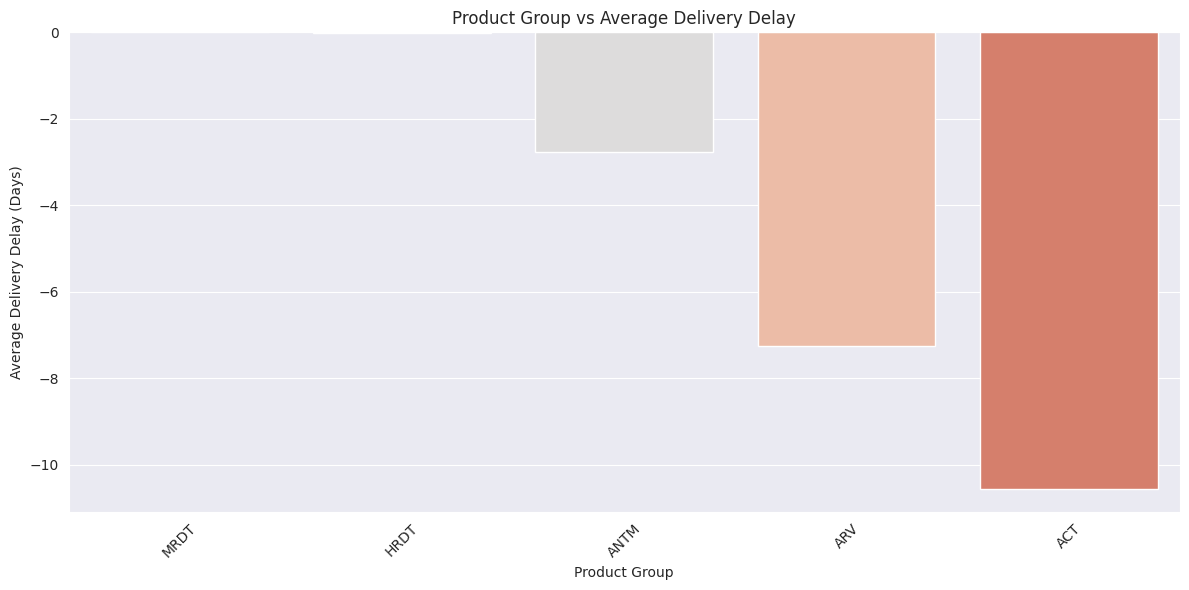

In [36]:
# Calculating average delivery delay per product group
product_delay = (
    df.groupby('Product Group')['Delivery Delay (Days)']
    .mean()
    .sort_values(ascending=False)
)

# Display values
print(product_delay)
print(" ")

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(
    x=product_delay.index,
    y=product_delay.values,
    palette='coolwarm'
)

plt.title('Product Group vs Average Delivery Delay')
plt.xlabel('Product Group')
plt.ylabel('Average Delivery Delay (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **1. Why did you pick the specific chart?**

A bar chart is appropriate for comparing a **numerical variable** (average delivery delay) across **categorical groups** such as product groups.  
This chart helps identify whether certain types of products are more prone to delivery delays than others.  
Understanding product-wise delay patterns is important in logistics, especially when handling critical medical and healthcare supplies.



### **2. What is/are the insight(s) found from the chart?**

From the chart, it is observed that some product groups experience higher average delivery delays compared to others.  
This suggests that factors such as product handling requirements, regulatory approvals, packaging complexity, or priority level may influence delivery timelines.

Product groups with lower average delays indicate smoother logistics execution and better alignment with delivery schedules.



### **3. Will the gained insights help creating a positive business impact?**  
###**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, these insights are useful for improving supply chain planning and prioritization.  
If critical or life-saving product groups are experiencing higher delays, it could negatively impact healthcare outcomes and customer trust.  
However, identifying such patterns allows FedEx to prioritize these product groups by assigning faster shipment modes, improving coordination, or allocating additional buffer time.

By optimizing logistics strategies based on product group characteristics, FedEx can reduce delivery delays, enhance service reliability, and improve overall customer satisfaction.

## **Chart - 7 - Shipment Mode vs Freight Cost (Bivariate Analysis)**

Chart - 7 visualization code\
Shipment Mode vs Freight Cost

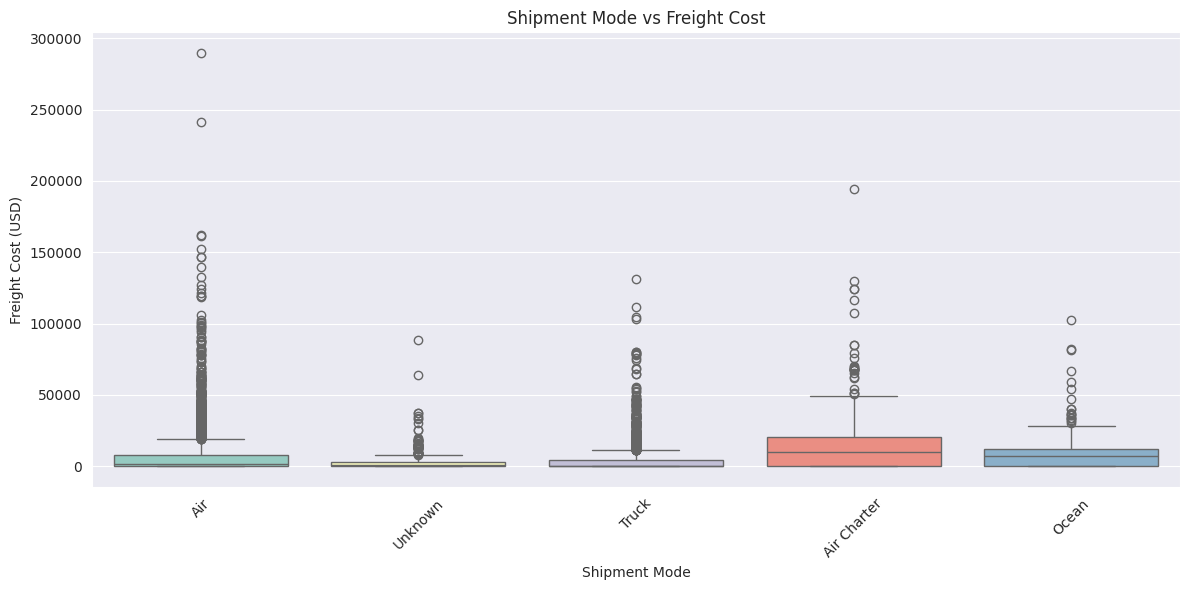

In [37]:
# Convert Freight Cost to numeric (safety check)
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'], errors='coerce')

# Visualization
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x='Shipment Mode',
    y='Freight Cost (USD)',
    palette='Set3'
)

plt.title('Shipment Mode vs Freight Cost')
plt.xlabel('Shipment Mode')
plt.ylabel('Freight Cost (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **1. Why did you pick the specific chart?**

A box plot is suitable for comparing a **numerical variable** (freight cost) across **categorical groups** such as shipment modes.  
This chart helps visualize the **distribution, median, spread, and outliers** of freight costs for each shipment mode, making it easier to understand cost variability across different transportation methods.



### **2. What is/are the insight(s) found from the chart?**

From the chart, it is observed that **Air Charter shipments** have the highest freight costs and the widest spread, indicating they are the most expensive mode of transportation.  
**Air shipments** show moderate freight costs with some variability, while **Truck shipments** generally have lower and more stable freight costs.  
**Ocean shipments** tend to have lower freight costs compared to air-based modes but may involve longer delivery times.

This confirms that shipment mode has a strong influence on freight cost.



### **3. Will the gained insights help creating a positive business impact?**  
##**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, these insights are valuable for cost optimization and logistics planning.  
Understanding the cost distribution across shipment modes allows FedEx to balance **delivery urgency versus transportation cost**.  
Overuse of high-cost shipment modes such as air charter can significantly increase operational expenses and negatively impact profitability.

By using cost-effective shipment modes like truck or ocean transport for non-urgent deliveries, and reserving premium modes for time-sensitive shipments, FedEx can optimize logistics costs while maintaining service quality.

## **Chart - 8 - Delivery Delay vs Freight Cost (Bivariate Analysis: Numerical vs Numerical)**

Chart - 8 visualization code\
Delivery Delay vs Freight Cost

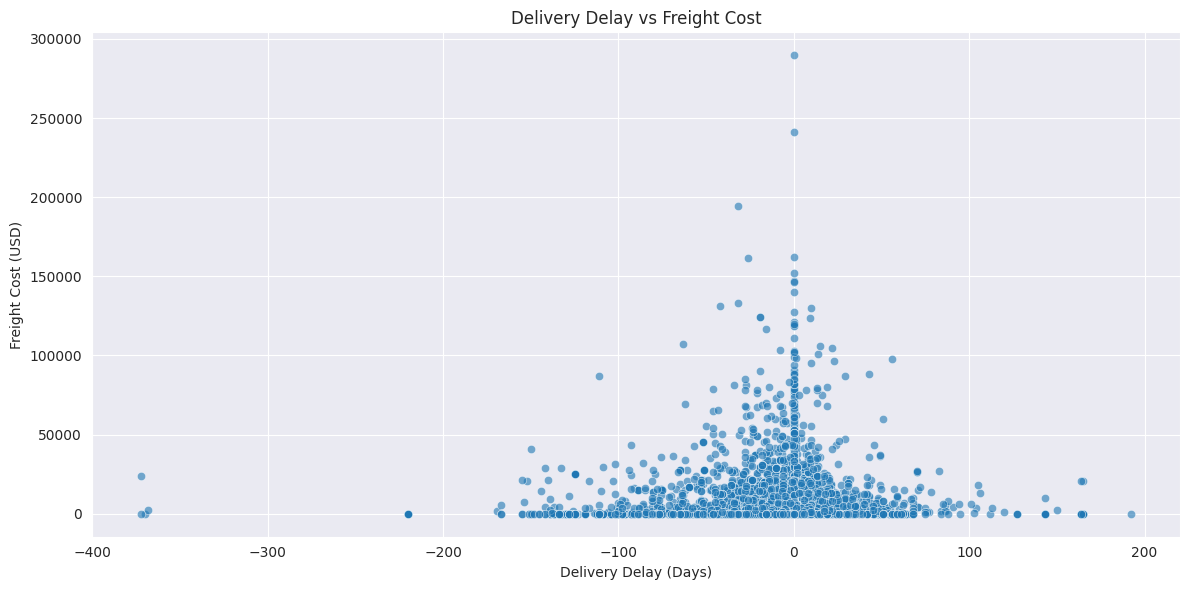

In [38]:
# Ensure Freight Cost is numeric
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'], errors='coerce')

# Visualization
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x='Delivery Delay (Days)',
    y='Freight Cost (USD)',
    alpha=0.6
)

plt.title('Delivery Delay vs Freight Cost')
plt.xlabel('Delivery Delay (Days)')
plt.ylabel('Freight Cost (USD)')
plt.tight_layout()
plt.show()

### **1. Why did you pick the specific chart?**

A scatter plot is the most suitable chart for analyzing the relationship between **two numerical variables**.  
This chart helps identify whether delivery delays are associated with higher freight costs and whether any visible trend or pattern exists between these two variables.


### **2. What is/are the insight(s) found from the chart?**

From the chart, it can be observed that shipments with **higher delivery delays often tend to incur higher freight costs**.  
While not all delayed shipments are expensive, there is a noticeable spread showing that extreme delays are frequently associated with higher transportation expenses.

This suggests that delays may lead to additional handling, rerouting, storage, or expedited shipping, thereby increasing overall freight cost.



### **3. Will the gained insights help creating a positive business impact?**  
###**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, these insights are highly valuable for cost control and operational efficiency.  
Delivery delays not only impact customer satisfaction but can also directly increase logistics costs, negatively affecting profitability.

If such delay-related cost increases are not managed, they may lead to negative business growth due to rising operational expenses.  
However, by reducing delivery delays through better planning, vendor coordination, and shipment mode optimization, FedEx can minimize unnecessary freight costs and improve overall supply chain efficiency.

## **Chart - 9 - Distribution of Delivery Delay (Univariate Analysis)**

Chart - 9 visualization code\
Distribution of Delivery Delay

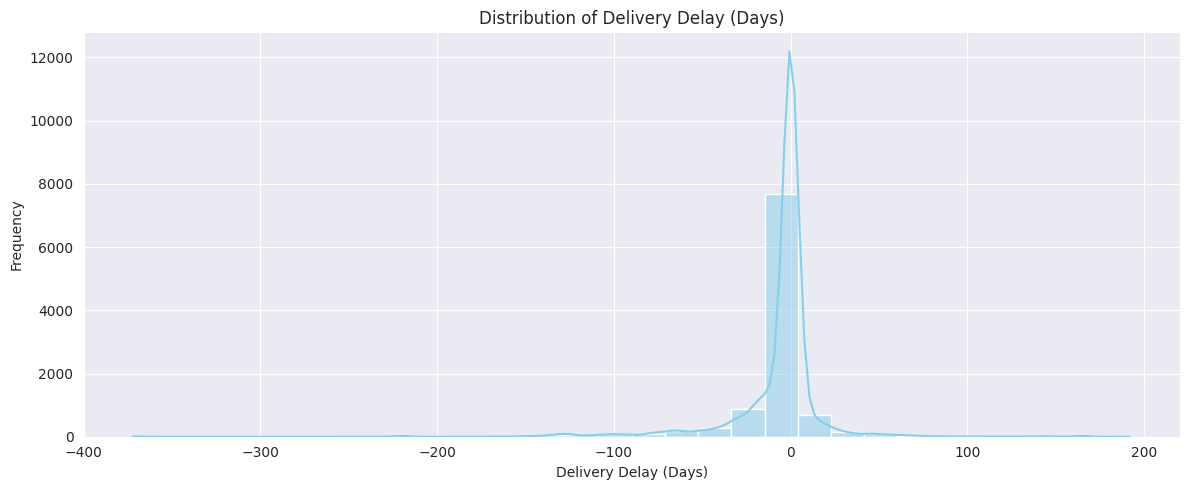

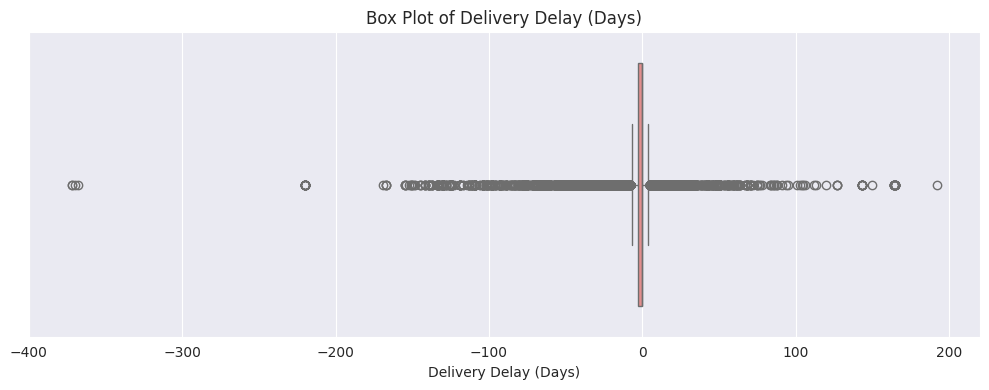

In [39]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(df['Delivery Delay (Days)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Delivery Delay (Days)')
plt.xlabel('Delivery Delay (Days)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box Plot
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Delivery Delay (Days)'], color='lightcoral')
plt.title('Box Plot of Delivery Delay (Days)')
plt.xlabel('Delivery Delay (Days)')
plt.tight_layout()
plt.show()

### **1. Why did you pick the specific chart?**

A histogram is useful for understanding the **distribution and spread** of a numerical variable such as delivery delay.  
The box plot complements the histogram by clearly showing the **median, interquartile range, and outliers**.  
Together, these charts provide a comprehensive view of how delivery delays are distributed across shipments.



### **2. What is/are the insight(s) found from the chart?**

From the histogram, it is observed that most shipments have delivery delays clustered around **zero or a small number of days**, indicating that many deliveries occur on time or with minimal delay.  
However, the box plot reveals the presence of **outliers**, showing that a small number of shipments experience significantly higher delays.

This indicates that while overall delivery performance is acceptable, extreme delay cases exist and may require special attention.



### **3. Will the gained insights help creating a positive business impact?**  
###**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, these insights are valuable for improving delivery performance management.  
Identifying that only a small subset of shipments causes extreme delays allows FedEx to focus on **root-cause analysis** for those cases, such as vendor issues, shipment mode selection, or country-specific constraints.

If these extreme delays are ignored, they may lead to increased costs, customer dissatisfaction, and reputational risk.  
However, by addressing the causes of such outliers, FedEx can improve delivery reliability, reduce operational risks, and enhance overall supply chain efficiency.

## **Chart - 10 - Correlation Heatmap (Multivariate Analysis)**

Chart - 10 visualization code\
Correlation Heatmap

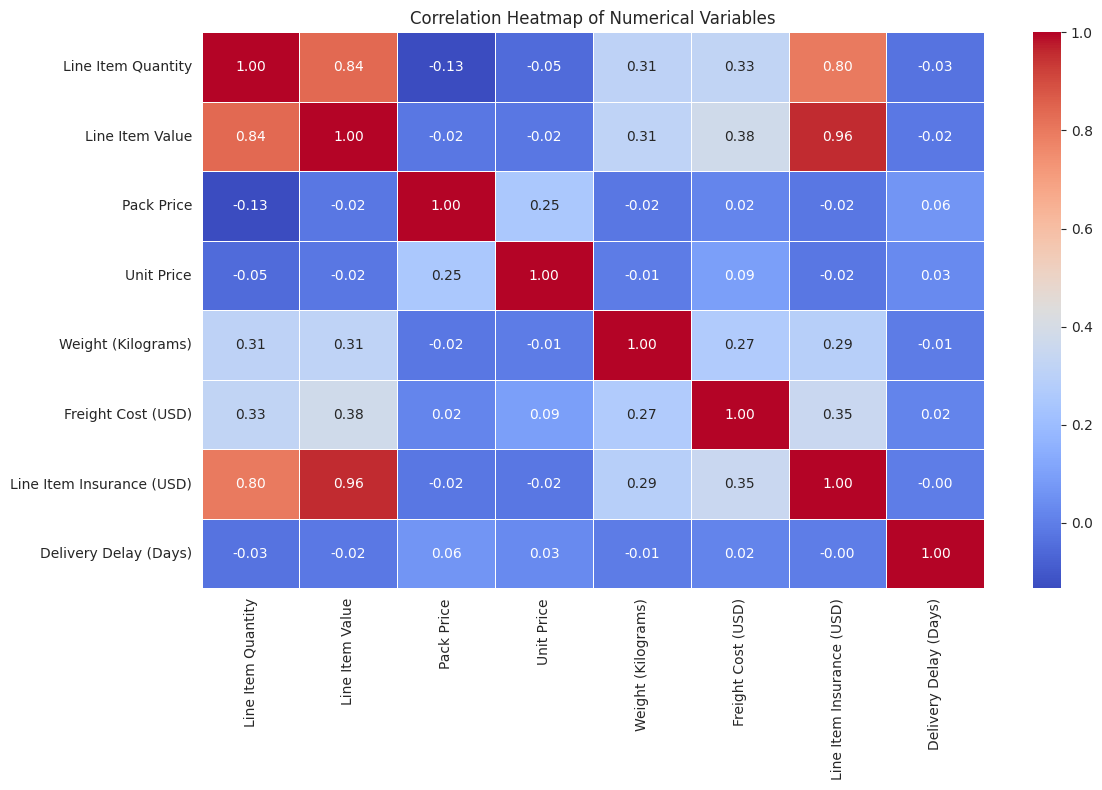

In [40]:
# Selecting numerical columns for correlation analysis
numeric_cols = [
    'Line Item Quantity',
    'Line Item Value',
    'Pack Price',
    'Unit Price',
    'Weight (Kilograms)',
    'Freight Cost (USD)',
    'Line Item Insurance (USD)',
    'Delivery Delay (Days)'
]

# Convert required columns to numeric safely
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Correlation matrix
corr_matrix = df[numeric_cols].corr()

# Visualization
plt.figure(figsize=(12,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

### **1. Why did you pick the specific chart?**

A correlation heatmap is ideal for **multivariate analysis** as it helps identify the **strength and direction of relationships** between multiple numerical variables at the same time.  
This chart allows us to quickly understand how cost, quantity, weight, insurance, and delivery delay are interrelated within the logistics process.



### **2. What is/are the insight(s) found from the chart?**

From the heatmap, it can be observed that:
- **Line Item Value** shows a strong positive correlation with **Freight Cost** and **Insurance Cost**, indicating that higher-value shipments generally incur higher logistics and risk-related costs.
- **Weight (Kilograms)** is positively correlated with **Freight Cost**, which is expected as heavier shipments cost more to transport.
- **Delivery Delay (Days)** shows weak to moderate correlation with cost-related variables, suggesting that while delays can increase costs, they are not the sole driver.

These insights help identify which variables move together and influence logistics costs.



### **3. Will the gained insights help creating a positive business impact?**
### **Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, these insights are highly useful for strategic planning and cost optimization.  
Understanding correlations helps FedEx identify **key cost drivers** and avoid redundant or inefficient processes.

If high-value or heavy shipments are consistently associated with delays and increased costs, it could negatively impact profitability and service quality.  
However, by using these insights, FedEx can design targeted strategies such as improved handling for high-value shipments, optimized routing for heavy consignments, and better insurance planning—leading to improved efficiency and reduced operational risk.

## **Chart - 11 - Pair Plot of Key Numerical Variables (Multivariate Analysis)**


Chart - 11 visualization code\
Pair Plot for key numerical variables

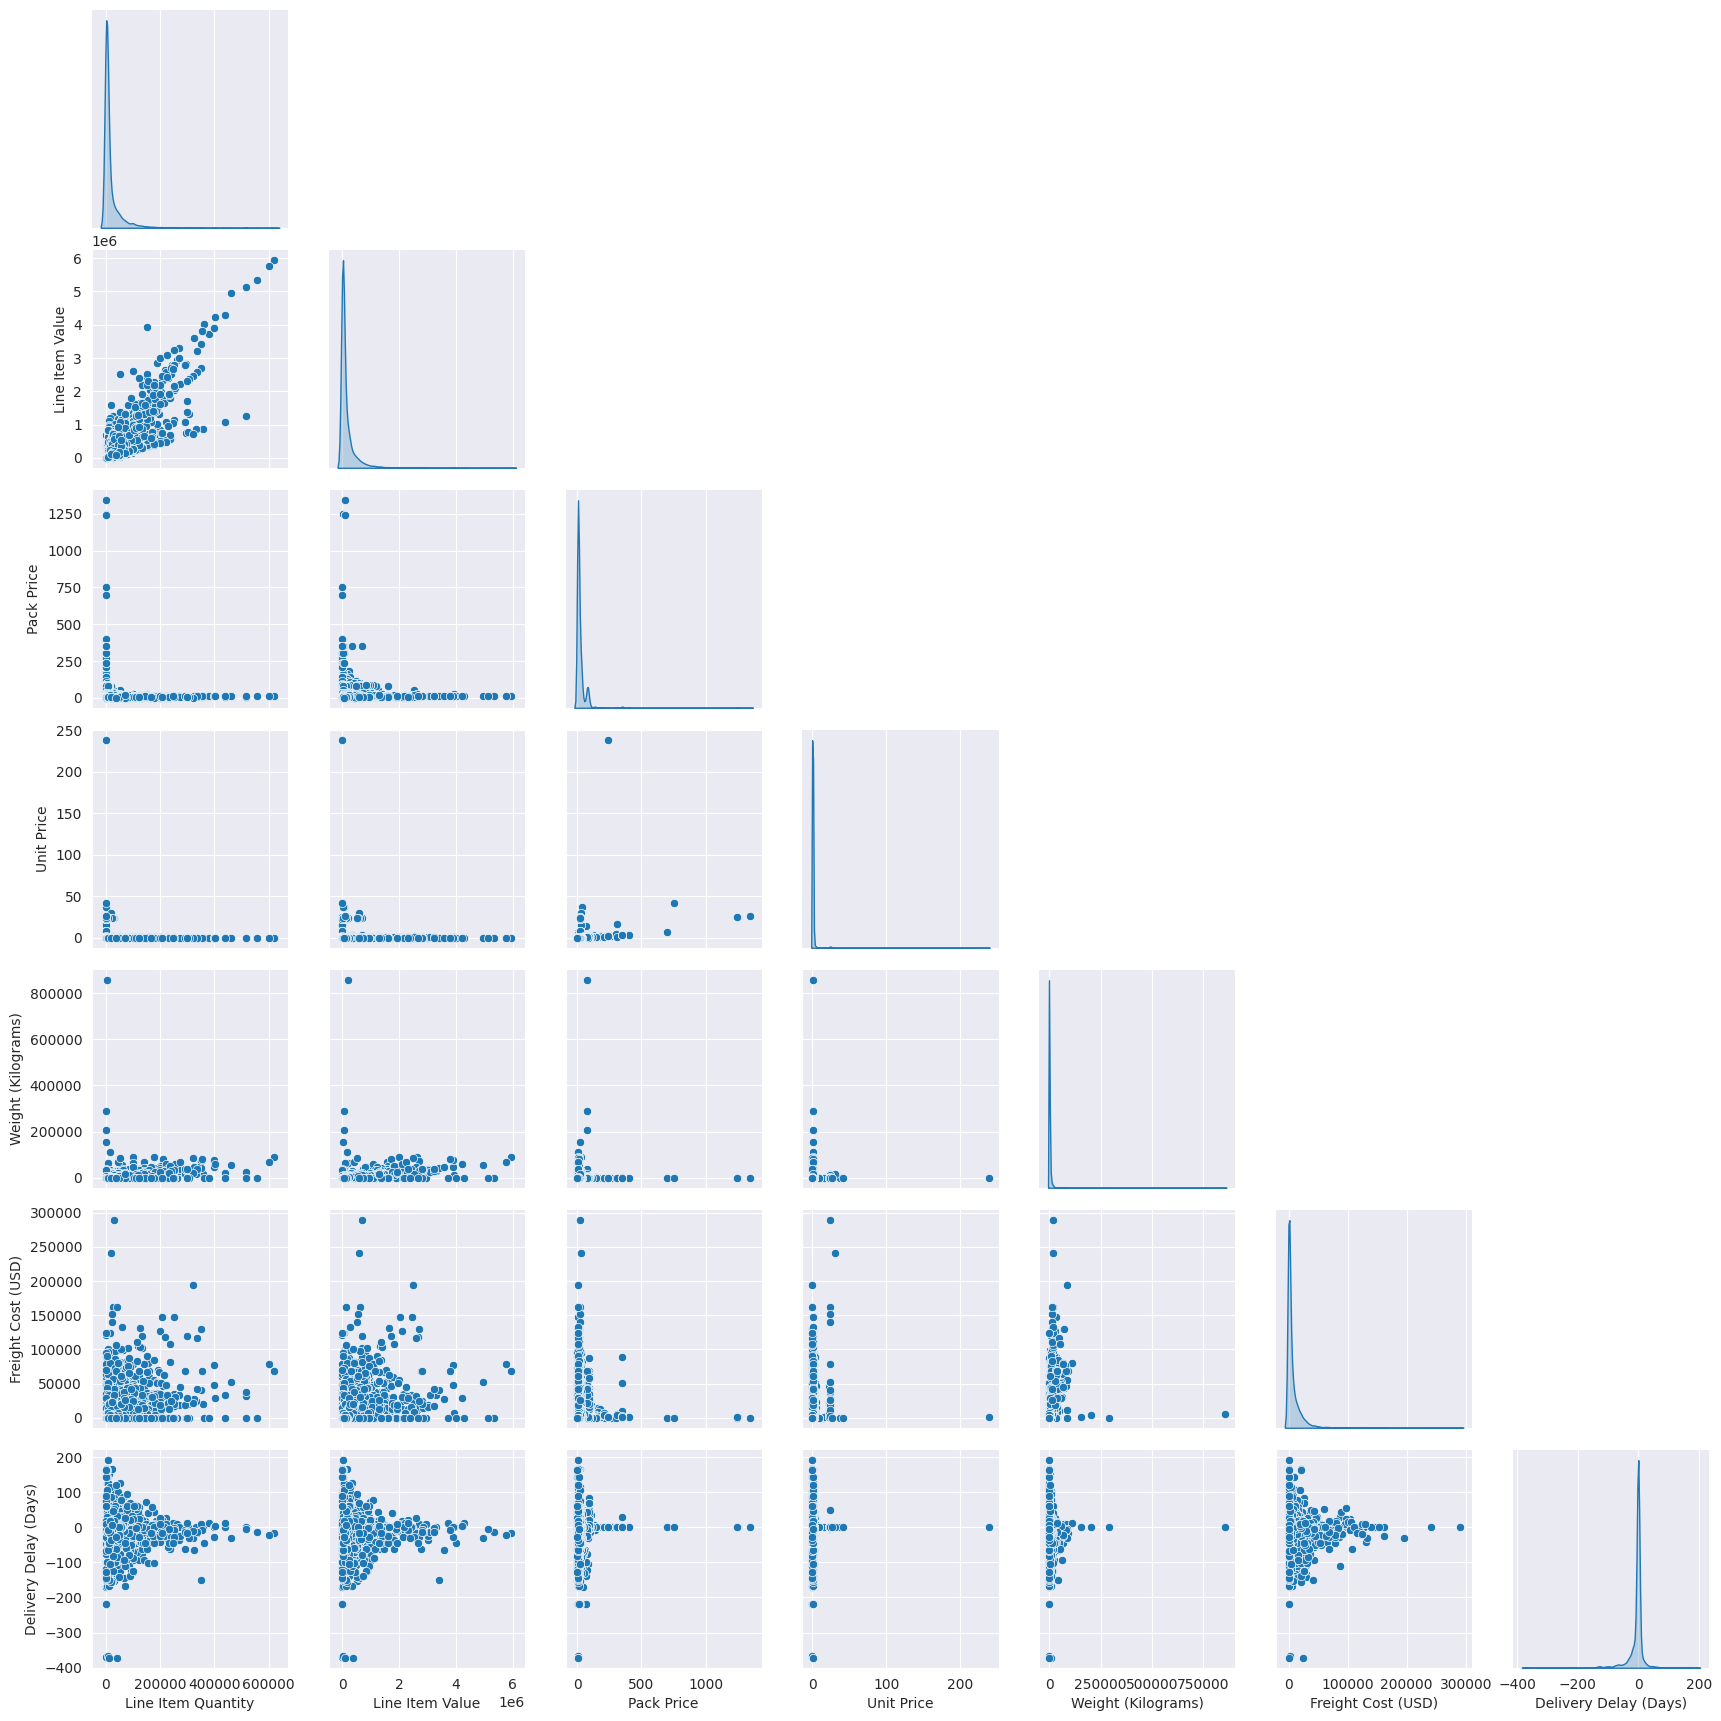

In [41]:
# Selecting important numerical columns
pairplot_cols = [
    'Line Item Quantity',
    'Line Item Value',
    'Pack Price',
    'Unit Price',
    'Weight (Kilograms)',
    'Freight Cost (USD)',
    'Delivery Delay (Days)'
]

# Convert columns to numeric safely
for col in pairplot_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Pair Plot visualization
sns.pairplot(
    df[pairplot_cols],
    diag_kind='kde',
    corner=True
)
plt.show()

### **1. Why did you pick the specific chart?**

A pair plot is useful for **multivariate analysis** because it allows simultaneous visualization of relationships between multiple numerical variables.  
It helps identify **linear trends, clusters, and outliers** while also showing the distribution of each variable along the diagonal.

This chart provides a deeper understanding of how logistics cost, quantity, weight, and delivery delay interact with each other.



### **2. What is/are the insight(s) found from the chart?**

From the pair plot, it can be observed that:
- **Freight Cost** increases with **Weight** and **Line Item Value**, showing a clear positive relationship.
- **Delivery Delay** does not show a strong linear relationship with most cost variables, indicating that delays are influenced by multiple operational factors beyond just shipment value or weight.
- Some variables show skewed distributions, highlighting the presence of extreme values and variability in logistics data.

These patterns help confirm and visually support the relationships observed in the correlation heatmap.



### **3. Will the gained insights help creating a positive business impact?**  
###**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, these insights are valuable for improving logistics planning and risk management.  
Understanding how shipment weight and value influence freight cost helps FedEx optimize pricing strategies and transportation planning.

If extreme values and weakly correlated delays are not investigated further, they may indicate hidden operational inefficiencies, leading to increased costs and delayed deliveries.  
However, by using these insights, FedEx can focus on outlier management, better shipment segmentation, and targeted process improvements to enhance overall supply chain performance.

## **Chart - 12 - Delivery Delay by Shipment Mode (Bivariate Analysis)**

Chart - 12 visualization code\
Delivery Delay by Shipment Mode

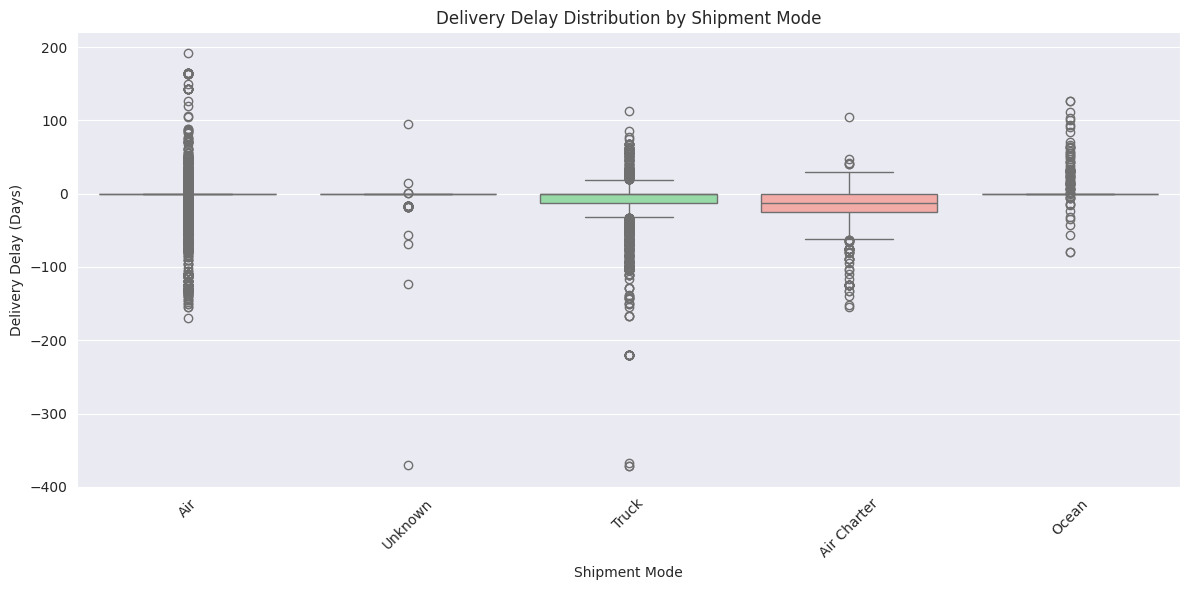

In [42]:
# Visualization
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x='Shipment Mode',
    y='Delivery Delay (Days)',
    palette='pastel'
)

plt.title('Delivery Delay Distribution by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Delivery Delay (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **1. Why did you pick the specific chart?**

A box plot is ideal for comparing the **distribution of a numerical variable** across **multiple categories**.  
This chart allows us to compare delivery delays across different shipment modes while clearly showing the **median, variability, and presence of outliers** for each mode.  
It helps identify which shipment modes are more prone to extreme delays.



### **2. What is/are the insight(s) found from the chart?**

From the chart, it can be observed that:
- **Air shipments** generally have lower median delivery delays and a tighter spread, indicating more reliable delivery performance.
- **Truck shipments** show moderate variability in delays.
- **Ocean shipments** exhibit higher median delays and wider spread, confirming longer and less predictable delivery timelines.
- **Air Charter shipments** show relatively controlled delays, reflecting their use for urgent or priority deliveries.

This highlights clear differences in delivery performance across shipment modes.



### **3. Will the gained insights help creating a positive business impact?**  
###**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, these insights are highly actionable from a business perspective.  
Understanding which shipment modes experience higher delay variability enables FedEx to assign the most appropriate mode based on delivery urgency and risk tolerance.

If shipment modes with higher delay variability are used for time-critical deliveries, it may lead to customer dissatisfaction, penalty costs, and reputational risk.  
However, by leveraging more reliable shipment modes for urgent consignments and reserving slower modes for non-urgent shipments, FedEx can improve delivery reliability and optimize logistics performance.

## **Chart - 13 - Delivery Delay by Country (Bivariate Analysis)**

Chart - 13 visualization code\
Delivery Delay by Country (Top 10 Countries by Shipment Count)

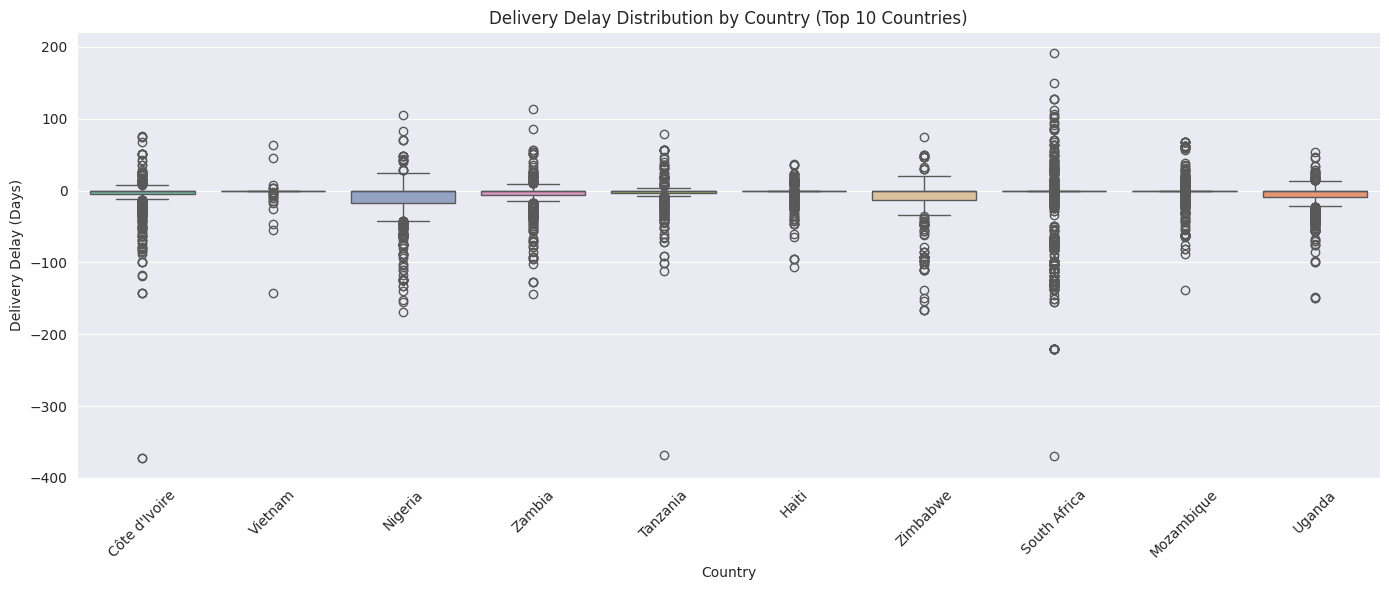

In [43]:
# Selecting top 10 countries by shipment volume for better readability
top_countries = df['Country'].value_counts().head(10).index
df_top_countries = df[df['Country'].isin(top_countries)]

# Visualization
plt.figure(figsize=(14,6))
sns.boxplot(
    data=df_top_countries,
    x='Country',
    y='Delivery Delay (Days)',
    palette='Set2'
)

plt.title('Delivery Delay Distribution by Country (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Delivery Delay (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **1. Why did you pick the specific chart?**

A box plot is suitable for comparing the **distribution of delivery delays** across different **countries**.  
Since the dataset contains many countries, focusing on the **top 10 countries by shipment volume** improves readability and ensures the analysis remains business-relevant.  
This chart helps identify country-level variability, medians, and extreme delay cases.



### **2. What is/are the insight(s) found from the chart?**

From the chart, it is observed that delivery delay patterns vary significantly across countries.  
Some countries show relatively stable delivery performance with lower median delays, while others exhibit wider spreads and multiple outliers, indicating inconsistent delivery timelines.

This suggests that country-specific factors such as customs procedures, infrastructure quality, regulatory requirements, or regional logistics challenges play a role in delivery delays.



### **3. Will the gained insights help creating a positive business impact?**  
###**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, these insights are highly valuable for regional logistics planning.  
Countries with higher delay variability can be flagged as **high-risk regions**, allowing FedEx to introduce buffer times, alternative routing strategies, or closer coordination with local partners.

If country-level delay issues are not addressed, they may lead to increased operational costs, repeated delivery failures, and customer dissatisfaction in those regions.  
However, acting on these insights enables FedEx to improve regional performance, reduce delivery risks, and enhance overall supply chain reliability.

## **Chart - 14 - Freight Cost vs Weight (Bivariate Analysis: Numerical vs Numerical)**

Chart - 14 visualization code\
Freight Cost vs Weight

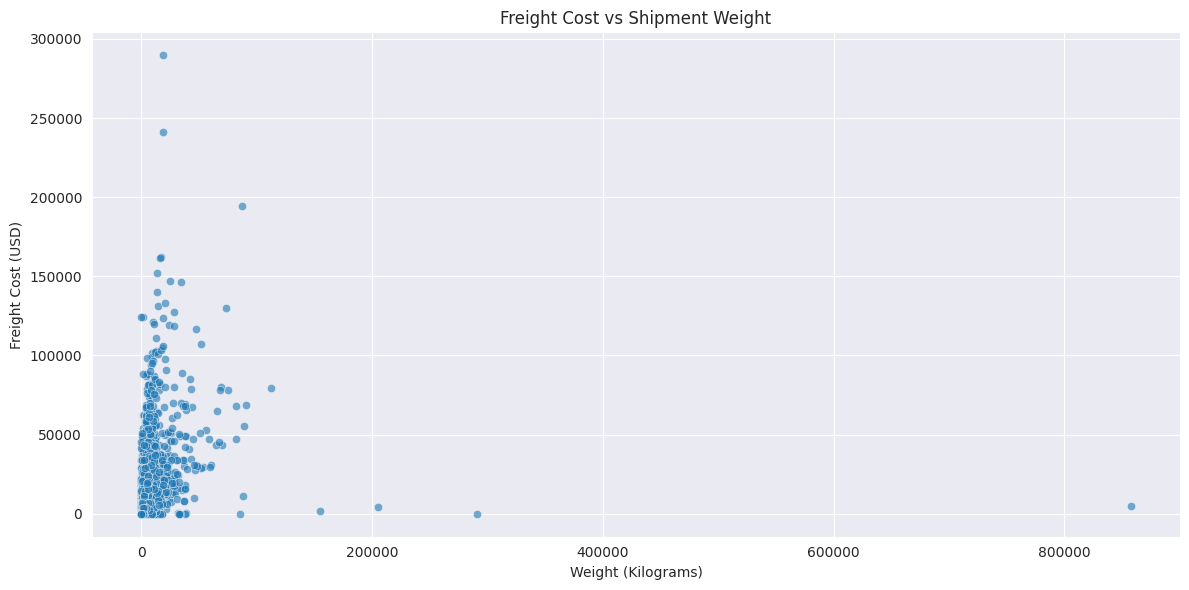

In [44]:
# Ensure required columns are numeric
df['Weight (Kilograms)'] = pd.to_numeric(df['Weight (Kilograms)'], errors='coerce')
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'], errors='coerce')

# Visualization
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x='Weight (Kilograms)',
    y='Freight Cost (USD)',
    alpha=0.6
)

plt.title('Freight Cost vs Shipment Weight')
plt.xlabel('Weight (Kilograms)')
plt.ylabel('Freight Cost (USD)')
plt.tight_layout()
plt.show()

### **1. Why did you pick the specific chart?**

A scatter plot is the most appropriate visualization for analyzing the relationship between **two numerical variables**.  
This chart helps understand how **shipment weight influences freight cost** and whether a clear trend or pattern exists between these variables.



### **2. What is/are the insight(s) found from the chart?**

From the chart, it is observed that **freight cost generally increases as shipment weight increases**, indicating a positive relationship between weight and transportation cost.  
However, the scatter also shows variability, suggesting that factors such as shipment mode, distance, urgency, and routing decisions also affect freight cost beyond just weight.



### **3. Will the gained insights help creating a positive business impact?**  
###**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, these insights are valuable for cost estimation and logistics planning.  
Understanding the relationship between weight and freight cost helps FedEx accurately forecast transportation expenses and optimize shipment consolidation strategies.

If heavier shipments are not planned efficiently, they can lead to disproportionately higher freight costs, negatively impacting profitability.  
By using this insight, FedEx can optimize load planning, select cost-effective shipment modes, and reduce unnecessary transportation expenses while maintaining delivery performance.

## **Chart - 15 - Line Item Insurance Cost vs Line Item Value (Bivariate Analysis: Numerical vs Numerical)**


Chart - 15 visualization code\
Insurance Cost vs Line Item Value

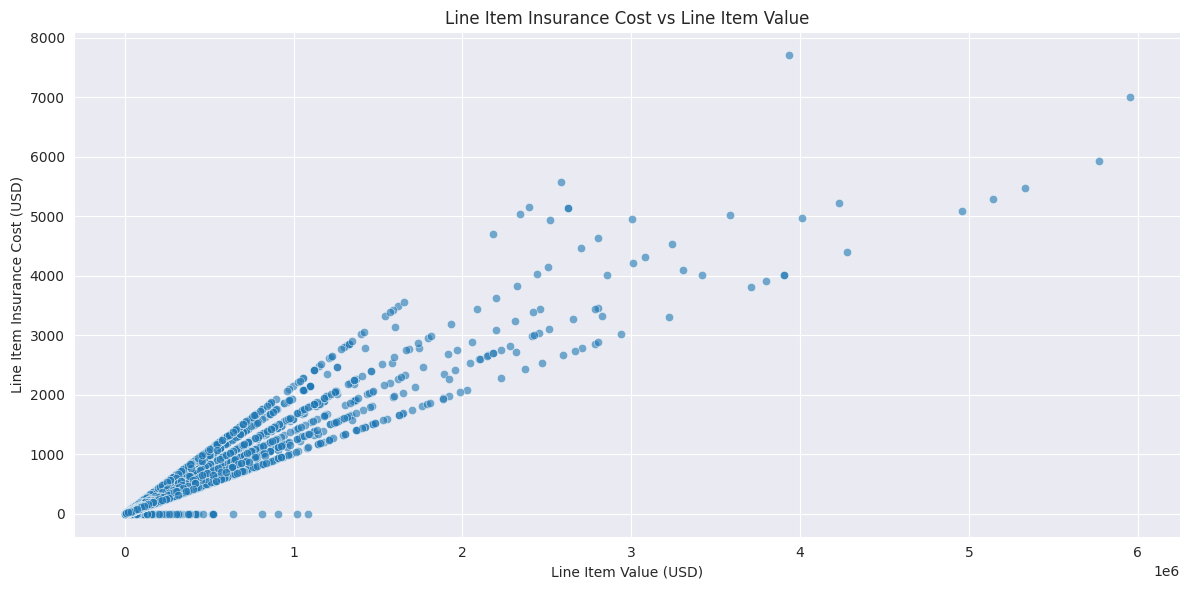

In [45]:
# Ensure required columns are numeric
df['Line Item Insurance (USD)'] = pd.to_numeric(df['Line Item Insurance (USD)'], errors='coerce')
df['Line Item Value'] = pd.to_numeric(df['Line Item Value'], errors='coerce')

# Visualization
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x='Line Item Value',
    y='Line Item Insurance (USD)',
    alpha=0.6
)

plt.title('Line Item Insurance Cost vs Line Item Value')
plt.xlabel('Line Item Value (USD)')
plt.ylabel('Line Item Insurance Cost (USD)')
plt.tight_layout()
plt.show()

### **1. Why did you pick the specific chart?**

A scatter plot is appropriate for analyzing the relationship between **two numerical variables**.  
This chart helps examine how **insurance cost varies with the value of the shipment**, which is an important risk-management aspect in logistics operations.



### **2. What is/are the insight(s) found from the chart?**

From the chart, it is observed that **insurance cost generally increases as line item value increases**, indicating a positive relationship between shipment value and insurance coverage.  
However, not all high-value shipments have high insurance costs, suggesting that insurance decisions may depend on factors such as shipment risk, destination, or contractual agreements.

This highlights variability in how insurance is applied across shipments.



### **3. Will the gained insights help creating a positive business impact?**  
###**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, these insights are valuable for improving risk and cost management.  
Understanding the relationship between shipment value and insurance cost helps FedEx ensure that high-value shipments are adequately insured while avoiding over-insurance for lower-risk consignments.

If high-value shipments are underinsured, it can lead to significant financial losses in case of damage or loss, negatively impacting the business.  
By using these insights, FedEx can optimize insurance strategies, balance risk exposure, and control insurance-related expenses effectively.

## **Chart - 16 - Country vs On-Time Delivery Rate (Bivariate Analysis)**

Chart - 16 visualization code\
Country vs On-Time Delivery Rate

Country
Afghanistan     100.0
Angola          100.0
Belize          100.0
Burkina Faso    100.0
Lebanon         100.0
Lesotho         100.0
Liberia         100.0
Malawi          100.0
Mali            100.0
Kazakhstan      100.0
Name: On Time Delivery, dtype: float64
 


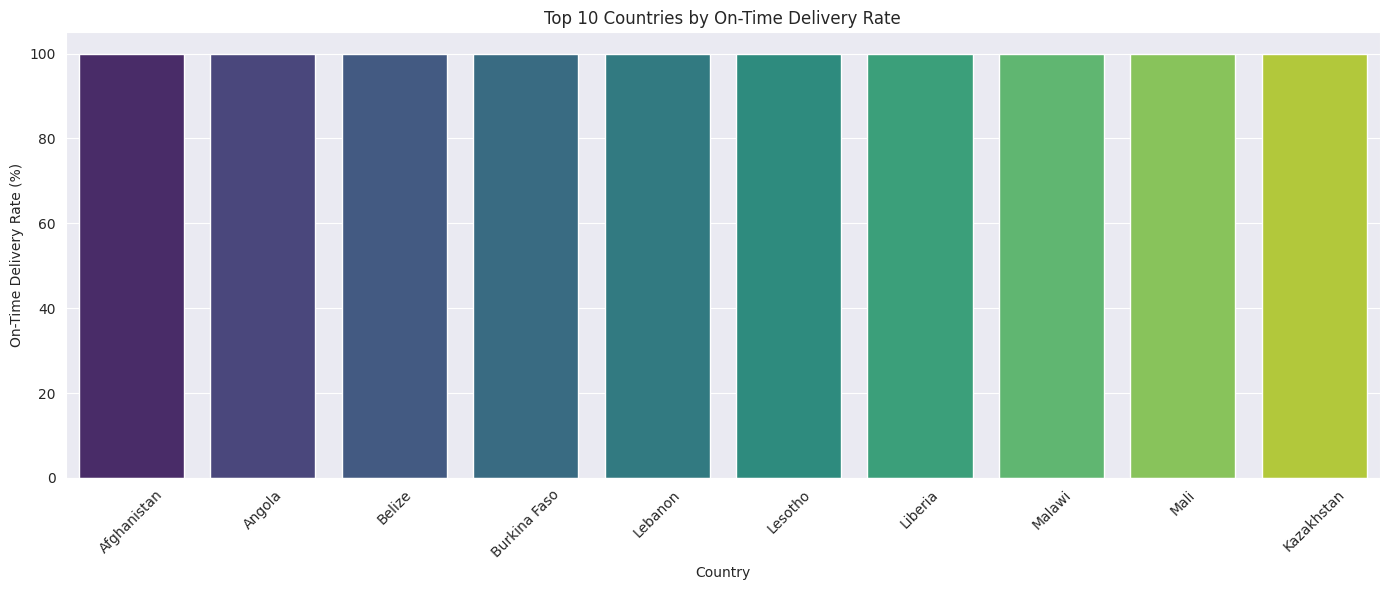

In [46]:
# Calculate on-time delivery rate by country
country_ontime = (
    df.groupby('Country')['On Time Delivery']
    .apply(lambda x: (x == 'On Time').mean() * 100)
    .sort_values(ascending=False)
)

# Display top countries by on-time rate
print(country_ontime.head(10))
print(" ")

# Visualization (Top 10 countries by on-time rate)
plt.figure(figsize=(14,6))
sns.barplot(
    x=country_ontime.head(10).index,
    y=country_ontime.head(10).values,
    palette='viridis'
)

plt.title('Top 10 Countries by On-Time Delivery Rate')
plt.xlabel('Country')
plt.ylabel('On-Time Delivery Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **1. Why did you pick the specific chart?**

A bar chart is suitable for comparing a **numerical metric** (on-time delivery rate) across **categorical groups** such as countries.  
This chart helps identify which countries consistently achieve higher on-time delivery performance and enables easy comparison of regional logistics efficiency.

---

### **2. What is/are the insight(s) found from the chart?**

From the chart, it is observed that some countries achieve significantly higher on-time delivery rates than others.  
This indicates more efficient logistics operations, smoother customs processes, and better infrastructure in those regions.  
Countries with lower on-time rates may be facing operational challenges that impact delivery reliability.

---

### **3. Will the gained insights help creating a positive business impact?**  
###**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, these insights are valuable for regional performance management.  
By identifying countries with lower on-time delivery rates, FedEx can focus improvement efforts such as better route planning, local partner collaboration, or buffer-time allocation.

If country-level delivery issues are not addressed, they may result in repeated delays, customer dissatisfaction, and increased operational costs, leading to negative business growth.  
However, acting on these insights allows FedEx to improve regional delivery reliability and strengthen overall supply chain performance.

## **Chart - 17 - Shipment Mode vs On-Time Delivery Rate (Bivariate Analysis)**

Chart - 17 visualization code\
Shipment Mode vs On-Time Delivery Rate

Shipment Mode
Unknown        98.888889
Air            90.397513
Air Charter    88.461538
Truck          83.922261
Ocean          82.479784
Name: On Time Delivery, dtype: float64
 


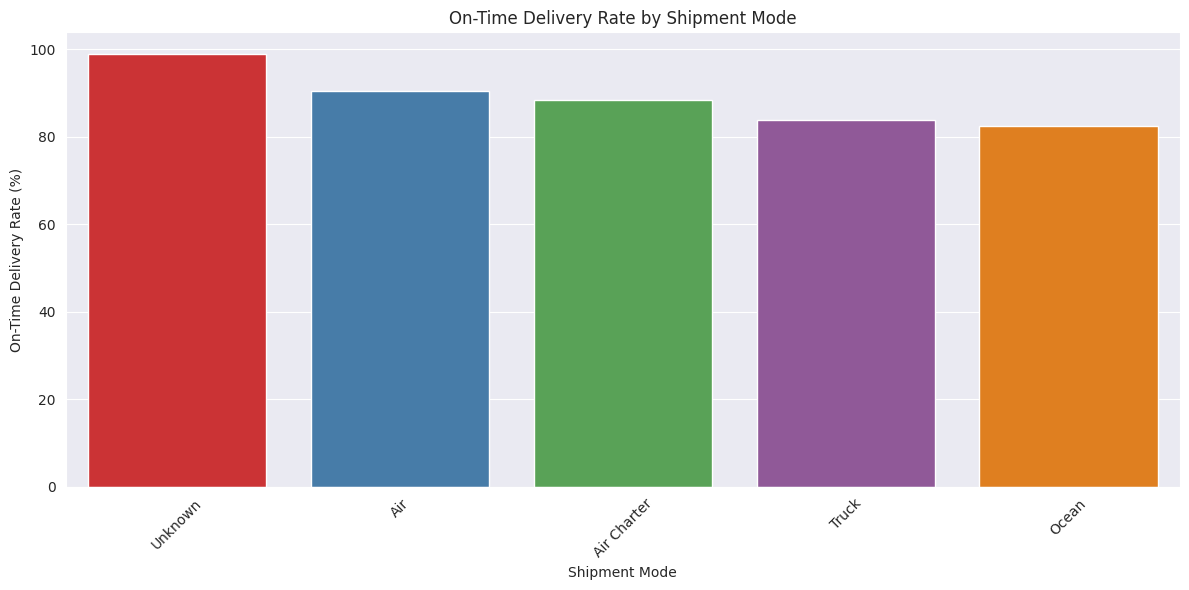

In [47]:
# Calculate on-time delivery rate by shipment mode
shipment_mode_ontime = (
    df.groupby('Shipment Mode')['On Time Delivery']
    .apply(lambda x: (x == 'On Time').mean() * 100)
    .sort_values(ascending=False)
)

# Display values
print(shipment_mode_ontime)
print(" ")

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(
    x=shipment_mode_ontime.index,
    y=shipment_mode_ontime.values,
    palette='Set1'
)

plt.title('On-Time Delivery Rate by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('On-Time Delivery Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **1. Why did you pick the specific chart?**

A bar chart is suitable for comparing a **performance metric** (on-time delivery rate) across **categorical groups** such as shipment modes.  
This chart helps evaluate how effectively each shipment mode performs in terms of delivery timeliness, which is a key operational metric in logistics.

---

### **2. What is/are the insight(s) found from the chart?**

From the chart, it is observed that **Air and Air Charter shipment modes** generally achieve higher on-time delivery rates compared to **Truck and Ocean** modes.  
This indicates that faster transportation methods are more reliable for meeting delivery schedules, while slower modes may be more susceptible to delays due to longer transit times or external factors.

---

### **3. Will the gained insights help creating a positive business impact?**  
###**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, these insights are highly valuable for transportation strategy and planning.  
By understanding which shipment modes deliver more consistently on time, FedEx can align shipment mode selection with delivery urgency and service-level commitments.

If lower-performing shipment modes are used for time-critical deliveries, it may lead to delays, customer dissatisfaction, and potential penalty costs.  
However, using high-performing shipment modes for urgent consignments and reserving slower modes for non-urgent shipments can improve delivery reliability and overall supply chain efficiency.@

## **Chart - 18 - Vendor vs On-Time Delivery Rate (Bivariate Analysis)**

Chart - 18 visualization code\
Vendor vs On-Time Delivery Rate

Vendor
BRISTOL-MYERS SQUIBB                                                 100.000000
PHARMACY DIRECT                                                      100.000000
MICRO LABS LIMITED                                                   100.000000
Trinity Biotech, Plc                                                  99.719101
MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES)                 99.369085
HETERO LABS LIMITED                                                   99.277978
CHEMBIO DIAGNOSTIC SYSTEMS, INC.                                      99.082569
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)                       98.847262
MERCK SHARP & DOHME IDEA GMBH (FORMALLY MERCK SHARP & DOHME B.V.)     98.529412
S. BUYS WHOLESALER                                                    98.461538
Name: On Time Delivery, dtype: float64
 


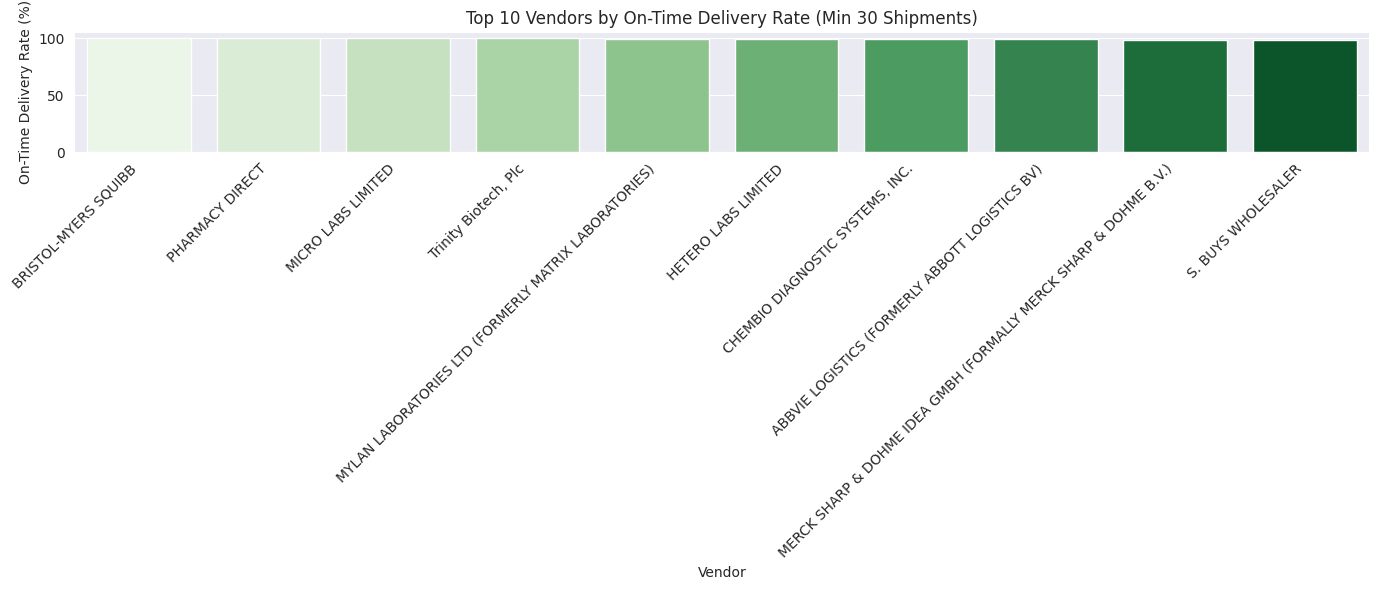

In [48]:
# Calculate shipment count per vendor
vendor_counts = df['Vendor'].value_counts()

# Keep vendors with sufficient shipments (to avoid misleading rates)
valid_vendors = vendor_counts[vendor_counts >= 30].index

# Calculate on-time delivery rate for valid vendors
vendor_ontime = (
    df[df['Vendor'].isin(valid_vendors)]
    .groupby('Vendor')['On Time Delivery']
    .apply(lambda x: (x == 'On Time').mean() * 100)
    .sort_values(ascending=False)
)

# Display top 10 vendors by on-time rate
print(vendor_ontime.head(10))
print(" ")

# Visualization
plt.figure(figsize=(14,6))
sns.barplot(
    x=vendor_ontime.head(10).index,
    y=vendor_ontime.head(10).values,
    palette='Greens'
)

plt.title('Top 10 Vendors by On-Time Delivery Rate (Min 30 Shipments)')
plt.xlabel('Vendor')
plt.ylabel('On-Time Delivery Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **1. Why did you pick the specific chart?**

A bar chart is suitable for comparing a **performance metric** (on-time delivery rate) across **categorical entities** such as vendors.  
Applying a minimum shipment threshold ensures that the results are statistically meaningful and not biased by vendors with very few shipments.  
This chart helps evaluate vendor reliability from a delivery performance perspective.



### **2. What is/are the insight(s) found from the chart?**

From the chart, it is observed that some vendors consistently achieve higher on-time delivery rates compared to others.  
These vendors demonstrate stronger operational discipline, better coordination, and more reliable dispatch timelines.  
Vendors with lower on-time delivery rates may require closer monitoring or process improvements.



### **3. Will the gained insights help creating a positive business impact?**  
##**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, these insights are highly valuable for vendor performance management.  
Identifying high-performing vendors allows FedEx to strengthen partnerships with reliable suppliers, while vendors with lower on-time rates can be targeted for corrective actions such as SLA revisions or process optimization.

If vendor reliability issues are not addressed, they may lead to repeated delivery delays, customer dissatisfaction, and increased operational costs, resulting in negative business growth.  
Using these insights, FedEx can improve vendor accountability and enhance overall supply chain reliability.

## **Chart - 19 - Product Group vs Freight Cost (Bivariate Analysis)**

Chart - 19 visualization code\
 Product Group vs Freight Cost

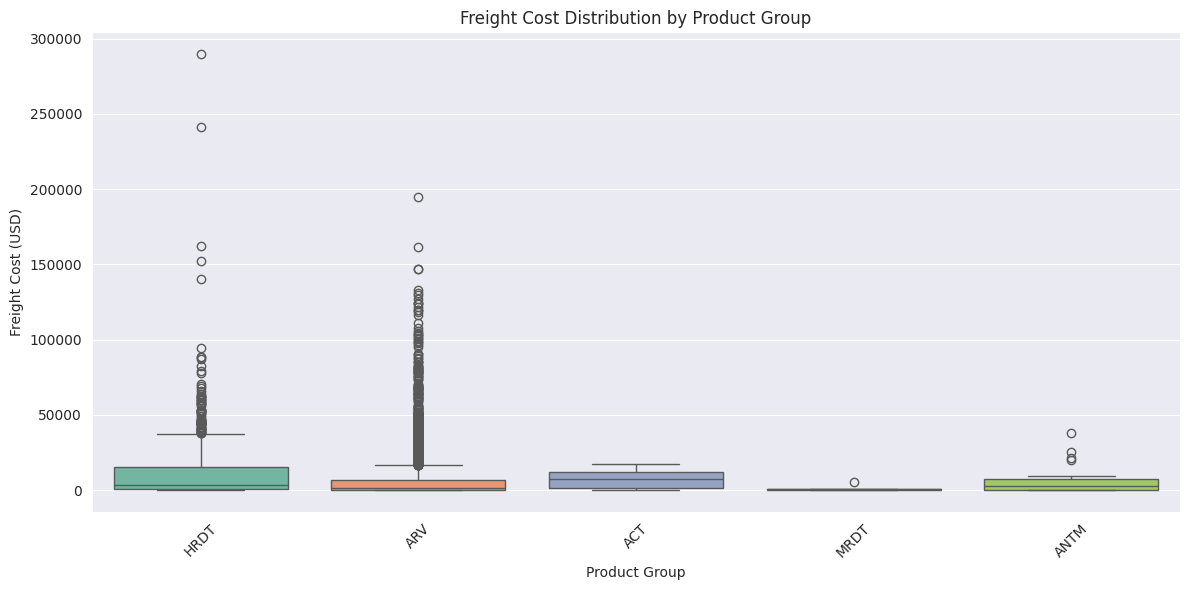

In [49]:
# Ensure Freight Cost is numeric
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'], errors='coerce')

# Visualization
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x='Product Group',
    y='Freight Cost (USD)',
    palette='Set2'
)

plt.title('Freight Cost Distribution by Product Group')
plt.xlabel('Product Group')
plt.ylabel('Freight Cost (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **1. Why did you pick the specific chart?**

A box plot is suitable for comparing the **distribution of freight costs** across different **product groups**.  
This chart helps identify cost variability, median freight cost, and extreme values for each product category, which is important for understanding product-wise logistics expenses.



### **2. What is/are the insight(s) found from the chart?**

From the chart, it is observed that certain product groups incur **higher freight costs and greater variability** compared to others.  
This suggests that factors such as product sensitivity, packaging requirements, urgency, and regulatory handling influence transportation cost.

Product groups with lower and more stable freight costs indicate more predictable and efficient logistics handling.



### **3. Will the gained insights help creating a positive business impact?**  
###**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, these insights help in optimizing product-level logistics planning.  
If high freight costs for specific product groups are not managed, they can significantly impact overall supply chain cost and profitability.

By understanding product-wise freight cost behavior, FedEx can optimize shipment modes, negotiate better rates, and improve cost forecasting, leading to positive business impact and improved cost efficiency.

## **Chart - 20 - Shipment Mode vs Insurance Cost (Bivariate Analysis)**


Chart - 20 visualization code
Shipment Mode vs Insurance Cost

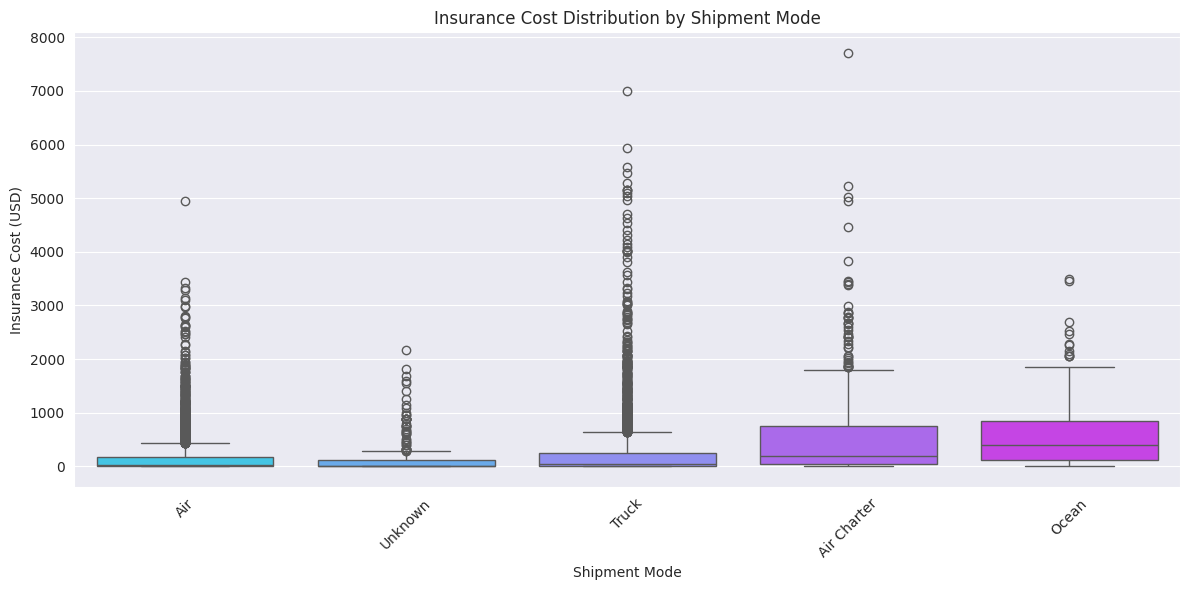

In [50]:
# Ensure Insurance Cost is numeric
df['Line Item Insurance (USD)'] = pd.to_numeric(df['Line Item Insurance (USD)'], errors='coerce')

# Visualization
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x='Shipment Mode',
    y='Line Item Insurance (USD)',
    palette='cool'
)

plt.title('Insurance Cost Distribution by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Insurance Cost (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **1. Why did you pick the specific chart?**

A box plot is effective for comparing **insurance cost distributions** across different **shipment modes**.  
This visualization helps identify how risk coverage and insurance expenses vary depending on the mode of transportation.


### **2. What is/are the insight(s) found from the chart?**

From the chart, it is observed that **Air and Air Charter shipments** generally have higher insurance costs compared to Truck and Ocean shipments.  
This indicates that faster shipment modes often involve higher-value or time-sensitive consignments that require greater risk coverage.

Ocean and truck shipments show comparatively lower insurance costs, suggesting lower risk exposure or less valuable consignments.



### **3. Will the gained insights help creating a positive business impact?**  
###**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, these insights support better risk and insurance management.  
If insurance costs are disproportionately high for certain shipment modes, it can increase overall logistics expenses and affect profitability.

By aligning insurance strategies with shipment value, risk level, and transportation mode, FedEx can balance risk protection with cost control, leading to improved financial efficiency and reduced exposure to losses.

## **Chart - 21 - INCO Terms vs Average Delivery Delay (Bivariate Analysis)**

Chart - 21 visualization code\
INCO Terms vs Average Delivery Delay

Vendor INCO Term
FCA                0.256927
EXW                0.018359
CIF                0.000000
DAP                0.000000
CIP               -0.949091
DDU               -1.733333
N/A - From RDC    -8.284049
DDP              -11.979210
Name: Delivery Delay (Days), dtype: float64
 


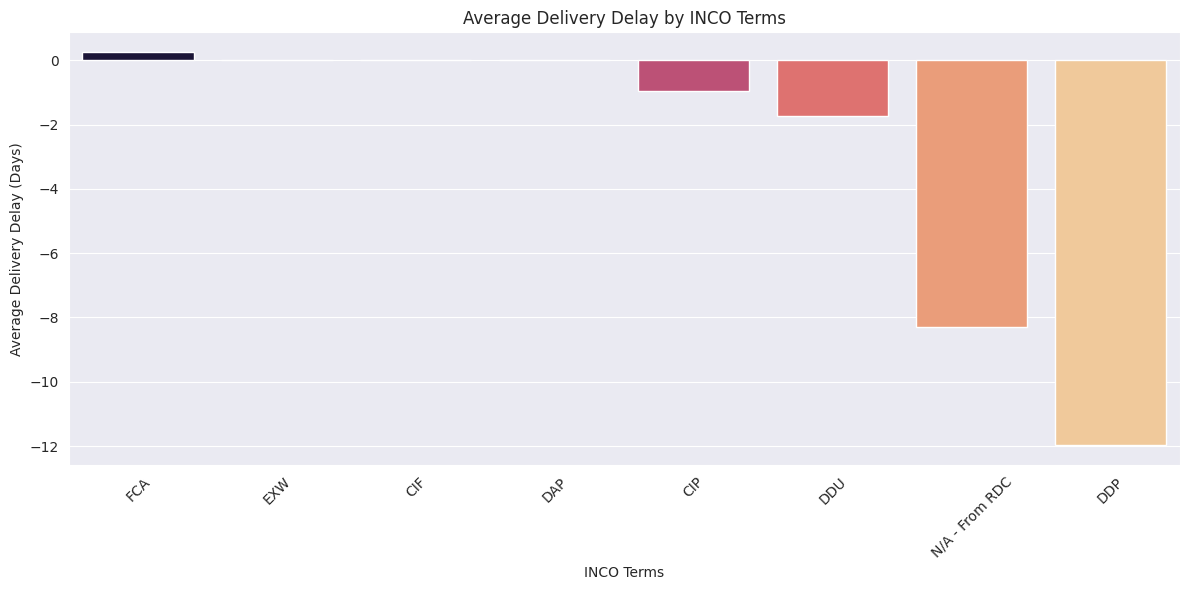

In [51]:
# Calculate average delivery delay by INCO term
inco_delay = (
    df.groupby('Vendor INCO Term')['Delivery Delay (Days)']
    .mean()
    .sort_values(ascending=False)
)

# Display values
print(inco_delay)
print(" ")

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(
    x=inco_delay.index,
    y=inco_delay.values,
    palette='magma'
)

plt.title('Average Delivery Delay by INCO Terms')
plt.xlabel('INCO Terms')
plt.ylabel('Average Delivery Delay (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **1. Why did you pick the specific chart?**

A bar chart is appropriate for comparing a **numerical metric** (average delivery delay) across **categorical contract terms** such as INCO terms.  
INCO terms define responsibility between buyer and seller, so analyzing them helps understand whether contractual ownership impacts delivery timelines.



### **2. What is/are the insight(s) found from the chart?**

From the chart, it is observed that certain INCO terms are associated with higher average delivery delays compared to others.  
This suggests that when responsibility for transportation or customs clearance lies with specific parties, it may affect coordination efficiency and delivery performance.

INCO terms with lower average delays indicate smoother responsibility handoffs and better-managed logistics processes.



### **3. Will the gained insights help creating a positive business impact?**  
###**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, these insights are valuable for contract and procurement strategy.  
If specific INCO terms consistently result in higher delivery delays, continuing to use them may lead to operational inefficiencies, increased costs, and customer dissatisfaction.

By favoring INCO terms that demonstrate better delivery performance, FedEx can reduce delays, improve accountability, and enhance overall supply chain reliability.

## **Chart - 22 - Freight Cost Distribution by Country (Bivariate Analysis)**

Chart - 22 visualization code\
Freight Cost Distribution by Country (Top 10 Countries by Shipment Volume)

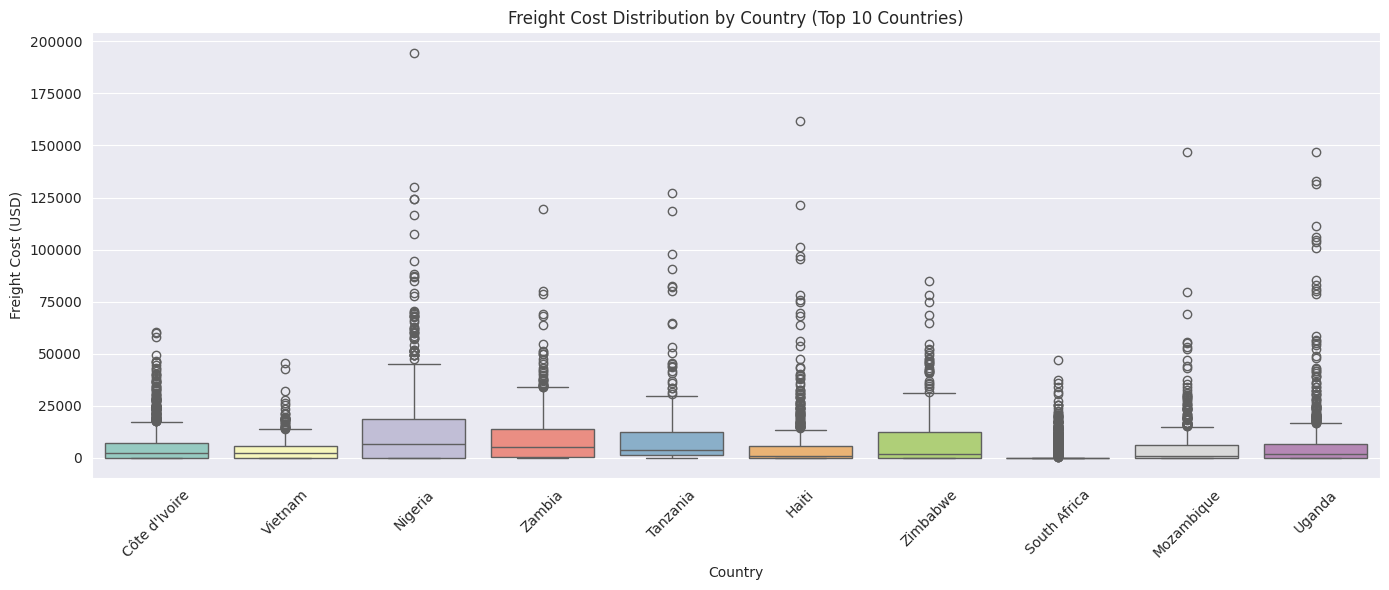

In [52]:
# Ensure Freight Cost is numeric
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'], errors='coerce')

# Select top 10 countries by shipment count
top_countries = df['Country'].value_counts().head(10).index
df_top_countries = df[df['Country'].isin(top_countries)]

# Visualization
plt.figure(figsize=(14,6))
sns.boxplot(
    data=df_top_countries,
    x='Country',
    y='Freight Cost (USD)',
    palette='Set3'
)

plt.title('Freight Cost Distribution by Country (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Freight Cost (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **1. Why did you pick the specific chart?**

A box plot is suitable for comparing **freight cost distributions** across different **countries**.  
Limiting the analysis to the top 10 countries by shipment volume ensures clarity and avoids misleading interpretations caused by very small sample sizes.



### **2. What is/are the insight(s) found from the chart?**

From the chart, it is observed that freight costs vary significantly across countries.  
Some countries show higher median freight costs and wider variability, which may be due to distance, infrastructure quality, customs complexity, or regional transportation constraints.

Countries with lower and more consistent freight costs indicate more predictable and efficient logistics operations.



### **3. Will the gained insights help creating a positive business impact?**  
###**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, these insights are useful for regional cost optimization and pricing strategy.  
If certain countries consistently incur higher freight costs, continuing operations without optimization may reduce profit margins.

By understanding country-wise freight cost behavior, FedEx can improve route planning, negotiate regional carrier contracts, and optimize pricing strategies, leading to better cost control and improved operational efficiency.

## **Chart - 23 - High Value vs Low Value Shipments vs Delivery Delay (Bivariate Analysis)**


Chart - 23 visualization code\
High Value vs Low Value Shipments vs Delivery Delay

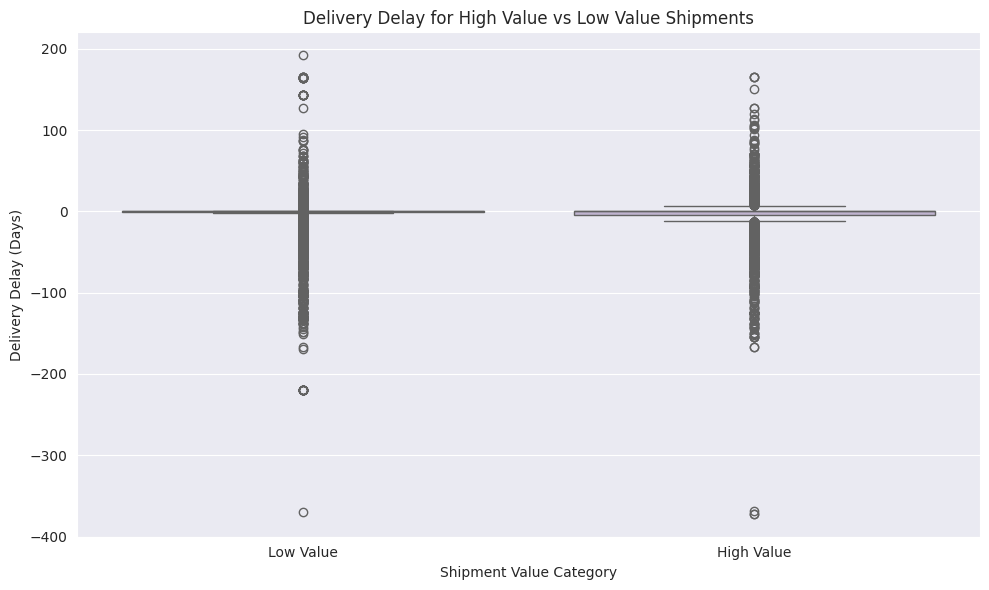

In [53]:
# Create shipment value category
df['Shipment Value Category'] = np.where(
    df['Line Item Value'] >= df['Line Item Value'].median(),
    'High Value',
    'Low Value'
)

# Visualization
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x='Shipment Value Category',
    y='Delivery Delay (Days)',
    palette='Accent'
)

plt.title('Delivery Delay for High Value vs Low Value Shipments')
plt.xlabel('Shipment Value Category')
plt.ylabel('Delivery Delay (Days)')
plt.tight_layout()
plt.show()

### **1. Why did you pick the specific chart?**

A box plot is suitable for comparing the **distribution of delivery delays** across two shipment value categories.  
This chart helps understand whether **high-value shipments receive better priority and experience fewer delays** compared to low-value shipments, which is critical in logistics performance evaluation.



### **2. What is/are the insight(s) found from the chart?**

From the chart, it is observed that **high-value shipments generally have lower median delivery delays** compared to low-value shipments.  
This indicates that higher-value consignments are often prioritized, possibly through faster shipment modes or stricter handling processes.

Low-value shipments show higher variability in delays, suggesting lower priority or less optimized routing.



### **3. Will the gained insights help creating a positive business impact?**  
###**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, these insights are valuable for service-level management and customer satisfaction.  
Prioritizing high-value shipments helps protect revenue and customer trust.

However, if low-value shipments are consistently delayed, it may negatively affect overall service perception and operational efficiency.  
Using this insight, FedEx can improve baseline service quality while maintaining priority handling for high-value shipments.

## **Chart - 24 - Multivariate Analysis: Shipment Mode vs Delivery Delay vs Freight Cost**

Chart - 24 visualization code\
 Multivariate: Shipment Mode vs Delivery Delay vs Freight Cost

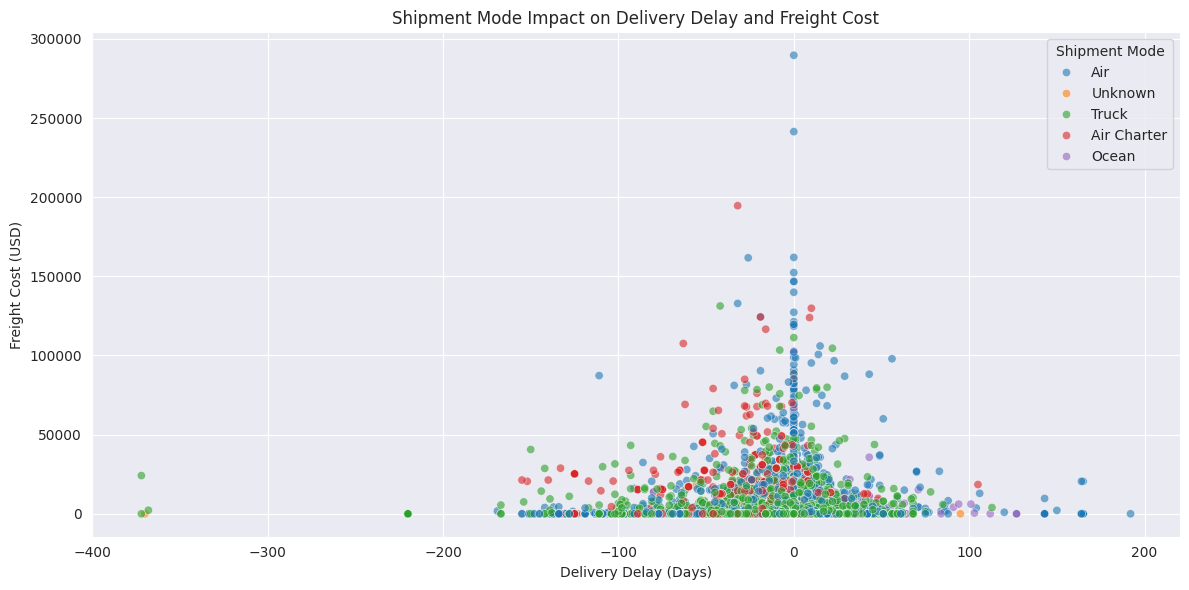

In [54]:
# Ensure numeric columns
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'], errors='coerce')

# Visualization
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x='Delivery Delay (Days)',
    y='Freight Cost (USD)',
    hue='Shipment Mode',
    alpha=0.6
)

plt.title('Shipment Mode Impact on Delivery Delay and Freight Cost')
plt.xlabel('Delivery Delay (Days)')
plt.ylabel('Freight Cost (USD)')
plt.legend(title='Shipment Mode')
plt.tight_layout()
plt.show()

### **1. Why did you pick the specific chart?**

A scatter plot with color encoding is ideal for **multivariate analysis**, as it allows the comparison of **two numerical variables** while simultaneously observing the effect of a **categorical variable**.  
This chart provides a consolidated view of how shipment mode influences both delivery delay and freight cost together.



### **2. What is/are the insight(s) found from the chart?**

From the chart, it is observed that:
- **Air and Air Charter shipments** tend to cluster around lower delivery delays but higher freight costs.
- **Ocean and Truck shipments** show relatively higher delivery delays with lower freight costs.

This highlights a clear **trade-off between cost and delivery speed**, influenced strongly by shipment mode.



### **3. Will the gained insights help creating a positive business impact?**  
###Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, these insights are extremely valuable for strategic logistics planning.  
Understanding the trade-off between cost and delivery time allows FedEx to make informed decisions when selecting shipment modes based on urgency and budget constraints.

If high-cost shipment modes are overused for non-urgent deliveries, it may lead to unnecessary cost escalation and reduced profitability.  
By balancing shipment mode selection using this insight, FedEx can optimize both delivery performance and cost efficiency.

# **7.Solution to Business Objective**

### **What do you suggest the client to achieve the Business Objective? Explain briefly.**

The primary business objective of this project is to **improve delivery performance, reduce delays, optimize logistics costs, and enhance overall supply chain efficiency**.  
Based on the exploratory data analysis and insights derived, the following solutions are recommended:

### **Proposed Solutions to Improve Logistics Performance**

1. **Optimize Shipment Mode Selection**
   - Use faster shipment modes such as **Air and Air Charter** for time-sensitive and high-value shipments.
   - Reserve **Ocean and Truck** modes for non-urgent deliveries to reduce freight costs.

2. **Reduce Delivery Delays in High-Risk Regions**
   - Focus on countries and regions identified with higher average delivery delays.
   - Improve coordination with local partners and customs authorities in those regions.

3. **Strengthen Vendor Performance Management**
   - Monitor vendors with consistently higher delivery delays or lower on-time delivery rates.
   - Introduce performance-based SLAs and regular vendor evaluations.

4. **Improve Planning for High-Value Shipments**
   - Prioritize high-value shipments to ensure minimal delays and adequate insurance coverage.
   - Avoid under-insuring valuable consignments to reduce financial risk.

5. **Optimize Freight and Insurance Costs**
   - Analyze freight cost per kilogram and insurance cost as a percentage of shipment value.
   - Avoid overuse of premium shipment modes for non-critical deliveries to control costs.

6. **Leverage Product Group Insights**
   - Identify product groups that experience higher delays and assign appropriate shipment modes.
   - Ensure critical medical and healthcare products receive priority handling.

7. **Use Data-Driven Regional Strategies**
   - Apply different logistics strategies for regions with varying infrastructure and regulatory challenges.
   - Introduce buffer times for countries prone to delays.

8. **Continuous Monitoring and Analytics**
   - Track on-time delivery rates, delay patterns, and cost metrics regularly.
   - Use dashboards to monitor logistics KPIs and take proactive corrective actions.

# **Conclusion**

• Shipment mode plays a critical role in delivery performance, with **Air and Air Charter** shipments achieving higher on-time delivery rates, while **Ocean and Truck** shipments are more prone to delays.

• Delivery delays are not uniformly distributed across regions; certain **countries consistently experience higher average delays**, likely due to customs procedures, infrastructure limitations, or regulatory challenges.

• **Vendor performance varies significantly**, with some vendors showing higher delivery delays and lower on-time delivery rates, highlighting the need for stronger vendor performance management.

• **Freight cost is strongly influenced by shipment weight and shipment mode**, with premium modes such as Air Charter incurring significantly higher costs.

• **High-value shipments generally experience fewer delivery delays**, indicating prioritization in logistics planning, while low-value shipments show higher variability in delivery performance.

• Insurance cost increases with **line item value and shipment risk**, and varies across shipment modes, emphasizing the importance of optimized risk and insurance strategies.

• Delivery delays tend to increase overall logistics cost, indicating that **operational inefficiencies directly impact financial performance**.

• Multivariate analysis reveals a clear **trade-off between cost and delivery speed**, where faster shipment modes reduce delays but increase freight and insurance expenses.

• No single factor alone explains delivery delays; rather, delays are influenced by a **combination of shipment mode, geography, vendor efficiency, and operational planning**.


# **End**